In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
files = os.listdir('Data')
print(files)

['Average spectra.txt', 'DA.txt', 'DA12.PNG', 'DA123.PNG', 'DA13.PNG', 'DA23.PNG', 'DA_fig.PNG', 'EPC-prediction.txt', 'Fourier transform infrared spectroscopic analysis of maize.pdf', 'Gromski_PLSDA_review.pdf', 'HC-prediction.txt', 'Improved Vancouver Raman Algorithm based on Empirical Mode Decomposition for Denoising Biological Samples.pdf', 'Loading.txt', 'PCA1.txt', 'PCA2.txt', 'PCA3.txt', 'PC_fig.PNG', 'Publication.pdf', 'Raman shift.txt', 'Raw-CD18.txt', 'Raw-EPC.txt', 'Raw-EPC2.txt', 'Raw-GN.txt', 'Raw-HC.txt', 'Raw-HC2.txt', 'Raw-HPDE.txt', 'Raw-MiaPaCa.txt', 'Scaled CD18.txt', 'Scaled GN.txt', 'Scaled HPDE.txt', 'Scaled MiaPaCa.txt']


In [6]:
df_average = pd.read_csv(r'Data\Average spectra.txt',sep='\t',header=[0,1])

In [7]:
df_average.head()

Unnamed: 0_level_0                                                Mean  \
  Unnamed: 0_level_1 Statistics On Rows of [Book9]H-HPDE!Col(B):Col(C34)   
0            719.421                                           1.963618    
1            720.629                                           1.889719    
2            721.838                                           1.854428    
3            723.046                                           1.793777    
4            724.253                                           1.746564    

                                   Standard Deviation  \
  Statistics On Rows of [Book9]H-HPDE!Col(B):Col(C34)   
0                                           1.243561    
1                                           1.202215    
2                                           1.155707    
3                                           1.122544    
4                                           1.094122    

                                                 Mean  \
  Statistics On Rows of [Book1]H-CD18!Col(B):Col(C32)   
0                                           2.089354    
1                                           2.004456    
2                                           1.955802    
3                                           1.928820    
4                                           1.866089    

                                   Standard Deviation  \
  Statistics On Rows of [Book1]H-CD18!Col(B):Col(C32)   
0                                           1.986297    
1                                           1.919989    
2                                           1.877348    
3                                           1.853950    
4                                           1.827821    

                                                     Mean  \
  Statistics On Rows of [Book2]H-MiaPaCa!Col(A1):Col(A31)   
0                                           1.009154        
1                                           0.950310        
2                                           0.902877        
3                                           0.878549        
4                                           0.844380        

                                       Standard Deviation  \
  Statistics On Rows of [Book2]H-MiaPaCa!Col(A1):Col(A31)   
0                                           1.718254        
1                                           1.691151        
2                                           1.648838        
3                                           1.622505        
4                                           1.596352        

                                             Mean  \
  Statistics On Rows of [Book8]H-GN!Col(B):Col(W)   
0                                        1.569937   
1                                        1.485904   
2                                        1.415847   
3                                        1.323568   
4                                        1.222392   

                               Standard Deviation  
  Statistics On Rows of [Book8]H-GN!Col(B):Col(W)  
0                                        1.113830  
1                                        1.096629  
2                                        1.076157  
3                                        1.041825  
4                                        0.991328

In [8]:
df_average.shape

(1014, 9)

In [9]:
columns=[('Raman','Frequency'),
         ('Mean','HPDE'),('Standard Deviation','HPDE'),
         ('Mean','CD'),('Standard Deviation','CD'),
         ('Mean','MiaPaCa'),('Standard Deviation','MiaPaCa'),
        ('Mean','GN'),('Standard Deviation','GN')]
df_average.columns = pd.MultiIndex.from_tuples(columns)
df_average.head()

Raman      Mean Standard Deviation      Mean Standard Deviation  \
  Frequency      HPDE               HPDE        CD                 CD   
0   719.421  1.963618           1.243561  2.089354           1.986297   
1   720.629  1.889719           1.202215  2.004456           1.919989   
2   721.838  1.854428           1.155707  1.955802           1.877348   
3   723.046  1.793777           1.122544  1.928820           1.853950   
4   724.253  1.746564           1.094122  1.866089           1.827821   

       Mean Standard Deviation      Mean Standard Deviation  
    MiaPaCa            MiaPaCa        GN                 GN  
0  1.009154           1.718254  1.569937           1.113830  
1  0.950310           1.691151  1.485904           1.096629  
2  0.902877           1.648838  1.415847           1.076157  
3  0.878549           1.622505  1.323568           1.041825  
4  0.844380           1.596352  1.222392           0.991328

In [10]:
df_average.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   (Raman, Frequency)             1014 non-null   float64
 1   (Mean, HPDE)                   1014 non-null   float64
 2   (Standard Deviation, HPDE)     1014 non-null   float64
 3   (Mean, CD)                     1014 non-null   float64
 4   (Standard Deviation, CD)       1014 non-null   float64
 5   (Mean, MiaPaCa)                1014 non-null   float64
 6   (Standard Deviation, MiaPaCa)  1014 non-null   float64
 7   (Mean, GN)                     1014 non-null   float64
 8   (Standard Deviation, GN)       1014 non-null   float64
dtypes: float64(9)
memory usage: 71.4 KB


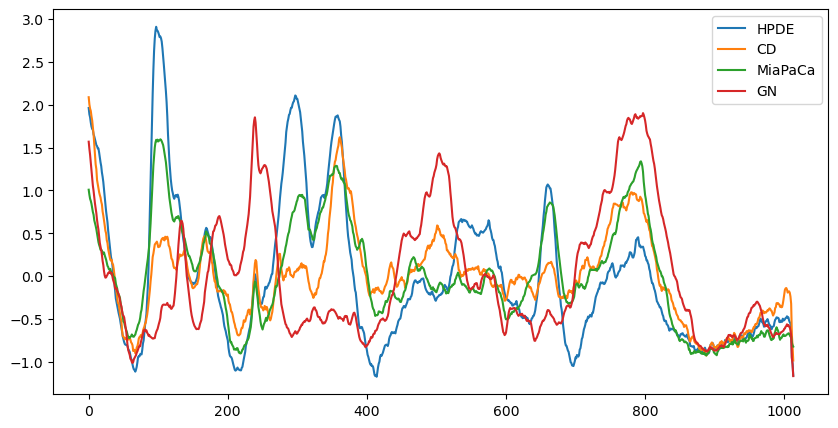

In [11]:
df_average.Mean.plot(figsize=(10,5))
plt.show()

Of course, this is spectroscopic data, which means that x-axis will be in frequency (cm$^{-1}$) and the y-axis will be the intensity.

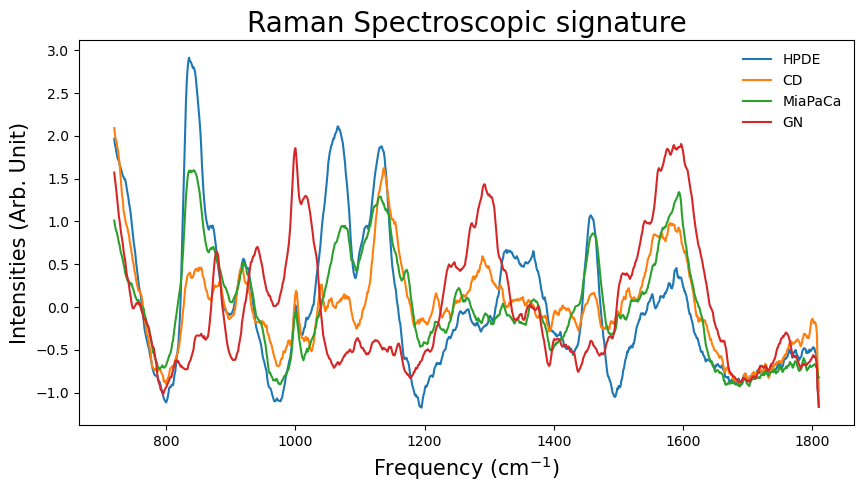

In [12]:
pd.option_context('mode.use_inf_as_na', True)
plt.figure(figsize=(10,5))
plt.title('Raman Spectroscopic signature', fontsize = 20)
plt.plot(df_average.Raman.Frequency,df_average.Mean.HPDE,label='HPDE')
plt.plot(df_average.Raman.Frequency,df_average.Mean.CD,label='CD')
plt.plot(df_average.Raman.Frequency,df_average.Mean.MiaPaCa,label='MiaPaCa')
plt.plot(df_average.Raman.Frequency,df_average.Mean.GN,label='GN')
plt.xlabel(r'Frequency (cm$^{-1}$)',fontsize=15)
plt.ylabel(r'Intensities (Arb. Unit)',fontsize=15)
plt.legend(frameon=False)
plt.show()

Another way to visualize the spectroscopic response for each cells.

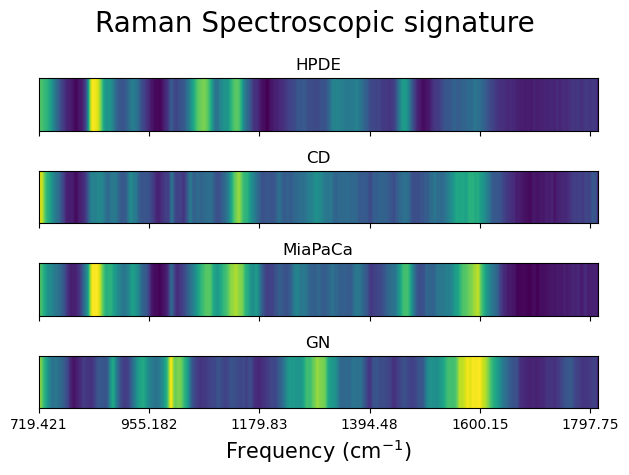

In [13]:
fig, ax = plt.subplots(4,1,sharex=True,sharey=True)
fig.suptitle('Raman Spectroscopic signature', fontsize = 20)
ax[0].imshow([df_average.Mean.HPDE], aspect="auto")
ax[1].imshow([df_average.Mean.CD], aspect="auto")
ax[2].imshow([df_average.Mean.MiaPaCa], aspect="auto")
ax[3].imshow([df_average.Mean.GN], aspect="auto")
ax[0].set_title('HPDE')
ax[1].set_title('CD')
ax[2].set_title('MiaPaCa')
ax[3].set_title('GN')
plt.yticks([])
plt.xticks(np.arange(0, 1013, 200),df_average.Raman.Frequency[::200])
plt.xlabel(r'Frequency (cm$^{-1}$)',fontsize=15)
plt.tight_layout()
'''
for i in range(4):
    ax[i].axvline(x=300, ymin=0.0, ymax=1.0, color='r', linestyle='--', alpha=1)
    ax[i].axvline(x=100, ymin=0.0, ymax=1.0, color='r', linestyle='--', alpha=1)
'''
plt.show()

Now, we can move onto the inspecting the raw data. 

In [14]:
df_raw_HPDE = pd.read_csv(r'Data\Raw-HPDE.txt',sep='\t',header=None)

In [15]:
df_raw_HPDE.head()

0           1           2           3           4           5   \
0  609.927974  516.114881  754.661668  705.967703  656.738695  632.528348   
1  577.079988  499.306887  741.311767  693.952930  651.909844  622.103451   
2  567.509144  494.778295  719.593730  685.773103  620.875998  593.277308   
3  556.111118  489.338721  702.361336  647.813375  603.297393  564.967912   
4  519.609050  484.045332  672.881351  625.759229  563.098662  549.233632   

           6           7           8           9   ...          25  \
0  772.015465  422.591102  765.996989  602.369577  ...  483.311159   
1  757.722958  412.738901  740.978701  567.555935  ...  452.666774   
2  731.967210  411.354746  721.044885  555.519644  ...  459.459738   
3  701.938234  408.748626  723.977596  521.221900  ...  419.189169   
4  695.287774  406.290715  703.507303  491.233679  ...  397.359816   

           26           27          28          29          30          31  \
0  705.507262  1094.091623  558.716439  629.404883  335.447784  541.850423   
1  653.969568  1056.672170  527.188433  625.360328  340.207145  561.789190   
2  657.261168  1051.190851  514.644116  630.355072  322.441626  626.401793   
3  619.732035  1046.468581  514.961627  614.845027  315.562896  674.224044   
4  574.102433  1035.141097  542.418861  596.166903  284.773470  675.428521   

           32          33          34  
0  648.142592  591.169453  500.048021  
1  618.756330  583.428277  470.389714  
2  622.671054  590.548488  461.038391  
3  604.256185  593.518858  407.134380  
4  611.291960  614.497281  404.700299  

[5 rows x 35 columns]

In [16]:
df_raw_HPDE.shape

(1014, 35)

In [17]:
df_raw_CD = pd.read_csv(r'Data\Raw-CD18.txt',sep='\t',header=None)

In [18]:
df_raw_CD.head()

0          1             2           3           4           5   \
0  462.250553 -88.956977  12211.075787  138.476666  722.523025  790.705515   
1  436.982475 -84.542468  10383.473577  139.684022  657.891275  779.193184   
2  418.922427 -39.028311   8976.035486  136.195751  628.512955  748.924845   
3  424.457974 -10.446520   6262.718792  146.769691  596.923084  741.777124   
4  422.589851   4.341221   4232.948800  140.303686  578.548094  701.832739   

             6           7           8          9   ...          23  \
0  16833.155629  482.846254  924.675995  18.519408  ...  682.997381   
1  17778.051350  411.258819  917.786714 -34.277209  ...  698.004300   
2  18697.846470  379.465945  924.332020 -40.762669  ...  713.090873   
3  20269.935530  367.395086  881.996792 -87.290297  ...  710.063955   
4  21081.587106  303.697568  865.527296 -81.014289  ...  711.436156   

            24          25          26            27          28           29  \
0  4134.879267  721.836516  570.964342  11876.248771  428.721259  1390.759272   
1  4108.956426  663.477808  565.805419  11187.847228  427.103716  1534.804320   
2  4115.688617  630.933029  558.807819  10571.188859  416.175049  1666.264862   
3  4136.342320  618.125645  552.979513   9670.870581  418.423881  1886.847811   
4  4166.678987  603.947787  533.675528   8967.153636  421.664330  1940.952292   

             30          31          32  
0  14686.044405  348.268072  636.765977  
1  15007.618378  303.723261  624.358963  
2  15376.107605  248.493055  598.615002  
3  16164.213116  213.520312  576.200426  
4  16767.097985  157.238793  551.541815  

[5 rows x 33 columns]

In [19]:
df_raw_CD.shape

(1014, 33)

In [20]:
df_frequency = pd.read_csv(r'Data\Raman shift.txt',sep='\t',header=None)

In [21]:
df_frequency.head()

0   1
0  719.421 NaN
1  720.629 NaN
2  721.838 NaN
3  723.046 NaN
4  724.253 NaN

In [22]:
df_frequency[1].isna().sum()

1014

In [23]:
df_frequency.drop(columns=1,axis=1,inplace=True)

In [24]:
df_frequency.head()

0
0  719.421
1  720.629
2  721.838
3  723.046
4  724.253

In [25]:
df_frequency.column = 'Frequency'

In [26]:
df_raw_EPC = pd.read_csv(r'Data\Raw-EPC.txt',sep='\s+',header=None)

In [27]:
df_raw_EPC.head()

0            1            2           3           4   \
0  3203.163535  6320.974384  6887.646015 -467.071908  309.968360   
1  3103.180691  6321.751083  6161.643276 -653.364664  352.574265   
2  2986.780580  6283.240725  5535.486579 -630.492983  392.886723   
3  2933.909809  6313.348074  5646.613963 -800.367063  466.192310   
4  2959.257669  6328.991128  6306.360640 -567.606996  475.672052   

             5            6            7            8            9   ...  \
0  23964.023828  4914.055589  2071.515841  7798.466443   927.605080  ...   
1  23180.087714  4665.178293  2089.593892  7536.362115  1031.550350  ...   
2  22482.484591  4311.171479  2064.169876  7288.770278  1110.889652  ...   
3  21778.753585  4068.409457  2068.370215  7058.793922  1297.059204  ...   
4  21194.492801  3748.711404  2084.700672  6776.520803  1518.303385  ...   

             45           46           47           48            49  \
0  17106.364263  3213.326052  2235.211800  1647.692268  17618.585039   
1  16108.988438  3196.324199  2227.484274  1640.470158  17481.837070   
2  15021.524728  3191.308086  2219.452056  1628.435502  17402.646657   
3  14279.604815  3162.814938  2218.215596  1642.432518  17757.111924   
4  13523.335750  3248.812738  2205.956784  1703.840559  18033.226992   

            50           51           52            53           54  
0  2041.744264  2277.645859 -1456.801366  13727.676672 -1119.050078  
1  2059.917444  2196.018035 -1353.687698  14036.332729 -1209.851583  
2  2050.200713  2114.993612 -1254.919115  14203.433016 -1466.771130  
3  2050.864642  2044.587138 -1162.628716  14727.702996 -1761.390038  
4  2093.804655  1969.941371  -977.857172  15065.059637 -1891.941108  

[5 rows x 55 columns]

In [28]:
df_raw_EPC.shape

(1013, 55)

In [29]:
df_raw_EPC2 = pd.read_csv(r'Data\Raw-EPC2.txt',sep='\s+',header=None)

In [30]:
df_raw_EPC2.head()

0           1           2           3            4            5    \
0  581.899206 -168.985577 -179.710030 -182.049615  2377.232531  1439.513142   
1  613.983272 -110.185162 -116.774939 -166.981462  2326.903225  1456.938548   
2  599.851085  -77.109569  -93.205683 -145.640647  2205.992330  1463.733499   
3  593.456322  -38.334370  -70.958203 -142.017365  2147.541559  1488.171605   
4  594.775348    7.628597  -28.362549  -71.620603  2058.137154  1506.016144   

            6           7            8            9    ...          110  \
0  56368.903752 -128.628921  8664.769405  1302.905387  ... -1026.891116   
1  54562.986421 -126.600008  8460.275539  1316.941872  ...  -979.478719   
2  52244.328672 -138.971015  8157.918141  1280.981950  ... -1005.070031   
3  48137.172235 -195.685023  7783.453295  1277.575975  ... -1024.451703   
4  42947.097344 -263.929965  7364.941814  1266.669817  ...  -972.301724   

           111         112          113         114         115          116  \
0  2108.599522  836.056391  2369.803079 -184.149094 -149.793292   977.776456   
1  2103.956206  809.058785  2606.446663 -129.519384  -99.907468   967.913236   
2  2167.187996  814.162470  2759.642151  -95.634574  -72.685480   981.259543   
3  2220.851608  855.599036  3196.568610  -62.872740  -28.588225   991.496365   
4  2341.520915  850.865488  3743.599119  -23.792392   17.693773  1031.349264   

            117         118          119  
0  15002.007838   -5.647692   820.770585  
1  13520.234276   25.535020   863.304970  
2  12134.442636   60.758067   896.288231  
3  10738.174535  273.647065   993.025950  
4   9166.361870  379.826107  1087.840792  

[5 rows x 120 columns]

In [31]:
df_raw_EPC2.shape

(1013, 120)

In [32]:
df_raw_GN = pd.read_csv(r'Data\Raw-GN.txt',sep='\s+',header=None)

In [33]:
df_raw_GN.head()

0            1            2            3            4   \
0  2160.348717  1314.579420  3218.265846  2351.634956  1718.374803   
1  2045.885705  1297.393931  3195.264459  2272.111147  1695.248236   
2  1989.764491  1252.535351  3138.935280  2239.438805  1672.247913   
3  1951.439372  1232.810425  3011.697036  2220.894062  1628.383404   
4  1897.763294  1183.869128  2876.850879  2193.998714  1506.630255   

            5            6            7           8            9   ...  \
0  1054.734117  1495.768736  1687.681208  838.412255  1455.511128  ...   
1  1085.340363  1431.383846  1603.925439  761.849748  1374.513051  ...   
2  1093.915553  1406.870278  1557.384257  705.467276  1367.470748  ...   
3  1159.616311  1353.378038  1502.961437  649.927359  1267.311728  ...   
4  1158.025564  1308.014322  1467.167992  566.581489  1144.444349  ...   

            12          13           14           15           16          17  \
0  1189.056338  655.610102  1195.173062  1364.227497  1059.646051  734.268796   
1  1061.548439  616.494438  1206.968712  1189.309195  1067.676532  721.596722   
2   970.183124  596.253803  1184.270459  1107.595288  1019.047836  680.217221   
3   851.921660  573.872773  1131.874819   953.322572   992.805555  646.171478   
4   748.880127  592.389565  1055.854998   844.907811   966.076031  634.805981   

            18           19           20           21  
0  2769.263332  3124.997898  1711.264905  1680.924476  
1  2642.759384  3006.950948  1668.187469  1613.478943  
2  2543.644357  2925.022553  1586.802863  1572.875803  
3  2456.899857  2838.141830  1506.328355  1478.687291  
4  2336.305663  2731.480400  1497.707680  1394.192856  

[5 rows x 22 columns]

In [34]:
df_raw_GN.shape

(1014, 22)

In [35]:
df_raw_HC = pd.read_csv(r'Data\Raw-HC.txt',sep='\s+',header=None)

In [36]:
df_raw_HC.head()

0            1          2           3           4           5   \
0  664.066369   891.519617 -55.185891  789.077141  756.648636  575.395903   
1  727.637950   938.968041 -20.001006  784.202377  811.105970  620.008865   
2  719.349410   943.849373   1.420800  777.689599  789.311420  625.776152   
3  771.963997   975.847488  40.013175  826.842720  816.972423  689.352168   
4  812.518125  1027.312499  74.733424  810.081306  847.967557  699.872646   

           6           7            8            9   ...          50  \
0  812.793173  631.869852  3377.424394  1225.919616  ...   29.214720   
1  837.406006  635.436913  3626.686697  1233.630143  ...   67.675125   
2  863.507211  649.299885  3937.332330  1242.919809  ...   92.551005   
3  876.225500  661.545420  4395.367705  1238.143204  ...  126.703477   
4  887.305153  679.512831  4807.660441  1252.448052  ...  154.074688   

            51           52          53            54            55  \
0  5741.079109 -4075.177635 -962.449543  46085.982967  16994.411469   
1  5845.833450 -2910.158181 -920.334063  44825.210704  16971.574966   
2  5930.309376 -2014.917612 -890.593846  43538.695113  16681.662158   
3  6084.008584  -462.622593 -903.940795  42375.339802  16546.408443   
4  6256.793708   325.072843 -866.324594  41136.213330  15818.275651   

           56           57           58            59  
0  -52.107264 -1290.924259 -1161.970246  20166.640066  
1   36.375592 -1183.832011 -1075.916837  18732.060172  
2   77.638293 -1108.209207 -1039.534287  17364.742541  
3   79.839218  -818.619517  -908.831754  14780.186982  
4  173.226593  -518.478614  -770.107138  12482.214654  

[5 rows x 60 columns]

In [37]:
df_raw_HC.shape

(1013, 60)

In [38]:
df_raw_HC2 = pd.read_csv(r'Data\Raw-HC2.txt',sep='\s+',header=None)

In [39]:
df_raw_HC2.head()

0           1           2           3           4           5    \
0  1008.600674 -176.331239 -248.210781 -211.621177 -152.701312 -163.797481   
1  1046.371463 -147.584618 -200.509401 -156.480285 -126.970755 -126.804979   
2   978.631157 -112.422007 -158.221211 -116.235692  -94.430349  -59.928333   
3   814.376885  -63.540342  -94.486609  -60.710620  -87.698196   -7.100967   
4   704.080718  -19.986074  -54.767168  -13.401172  -47.806272   45.427068   

          6           7           8           9    ...         100  \
0  114.916213  -26.551247 -204.156848 -922.529271  ... -118.983831   
1  226.510538   48.387896 -145.021424 -887.725883  ... -296.501999   
2  298.777360   88.365984 -111.003317 -883.415887  ... -504.824634   
3  394.487054  146.945886  -61.440373 -836.645116  ... -684.975727   
4  450.609431  182.098345   -8.919438 -776.367364  ... -659.530411   

          101         102         103           104          105         106  \
0 -785.670250 -442.223228 -565.895180  11899.686997 -1466.700795   40.748809   
1 -549.425264 -479.016974 -495.175035  11579.851837 -1202.731401   87.915315   
2 -362.698155 -513.150226 -435.747824  11314.132757  -971.307879  105.810732   
3  -55.706231 -535.935830 -359.469506  11176.782171  -626.442796  155.594252   
4  143.510836 -486.122782 -270.028946  11164.175387  -329.362564  145.734191   

         107          108         109  
0 -78.988593  -821.789023  872.508664  
1 -60.076447  -941.850909  866.826500  
2 -29.435275 -1017.920529  915.228065  
3   3.855931 -1183.958936  920.117639  
4  53.843324 -1262.201270  872.797323  

[5 rows x 110 columns]

In [40]:
df_raw_HC2.shape

(1013, 110)

In [41]:
df_raw_MiaPaCa = pd.read_csv(r'Data\Raw-MiaPaCa.txt',sep='\s+',header=None)

In [42]:
df_raw_MiaPaCa.head()

0            1          2           3           4           5   \
0  986.134289  3191.825457  -2.535792  381.293306  -14.670542  222.150897   
1  968.238898  2387.663019 -13.405950  323.864640  -13.062933  221.195522   
2  940.958141  2042.282002  -4.439658  283.158469   18.430079  212.515654   
3  931.451280  1140.520027  16.551258  240.507895   72.736326  195.481008   
4  897.871235   957.922213   8.585703  220.874240  103.296138  186.407781   

           6          7            8            9   ...            21  \
0  283.214723 -10.688220  4014.044286  1567.222465  ...  28581.246327   
1  274.867820  -6.973148  3329.342639  1497.822661  ...  27494.121593   
2  304.850952   0.275607  2779.738368  1405.961540  ...  26730.718074   
3  391.133158  26.687282  2049.528623  1295.990866  ...  26154.070758   
4  503.418555  37.810452  1464.217353  1168.197266  ...  25731.896853   

           22          23           24          25          26          27  \
0  319.677679  755.957734  8008.400770  550.821570  475.220347  424.548050   
1  314.584347  706.747435  7704.657802  543.220942  475.095789  401.035342   
2  306.062605  687.922333  7546.049323  546.734571  457.565767  394.257941   
3  306.240677  665.283137  7362.425379  527.072509  452.180077  386.850138   
4  300.289221  652.321148  7330.103420  524.098047  431.193937  378.305130   

           28         29          30  
0  183.399571  49.565123  291.349689  
1  165.500022  55.983494  298.719220  
2  153.319906  51.380073  301.287580  
3  161.356251  29.136447  302.037695  
4  153.314808  42.126248  288.379379  

[5 rows x 31 columns]

In [43]:
df_raw_MiaPaCa.shape

(1014, 31)

Since the shape is either 1013 or 1014, we can drop one data point to make 1013 data points universal.

In [44]:
df_frequency.drop([0],inplace=True)

In [45]:
df_average.drop([0],inplace=True)

In [46]:
df_raw_CD.drop([0],inplace=True)
df_raw_HPDE.drop([0],inplace=True)
df_raw_GN.drop([0],inplace=True)
df_raw_MiaPaCa.drop([0],inplace=True)

In [47]:
print(df_average.shape)
print(df_raw_CD.shape)
print(df_raw_HPDE.shape)
print(df_raw_GN.shape)
print(df_raw_MiaPaCa.shape)

(1013, 9)
(1013, 33)
(1013, 35)
(1013, 22)
(1013, 31)


Now we can visualize the data for each cells

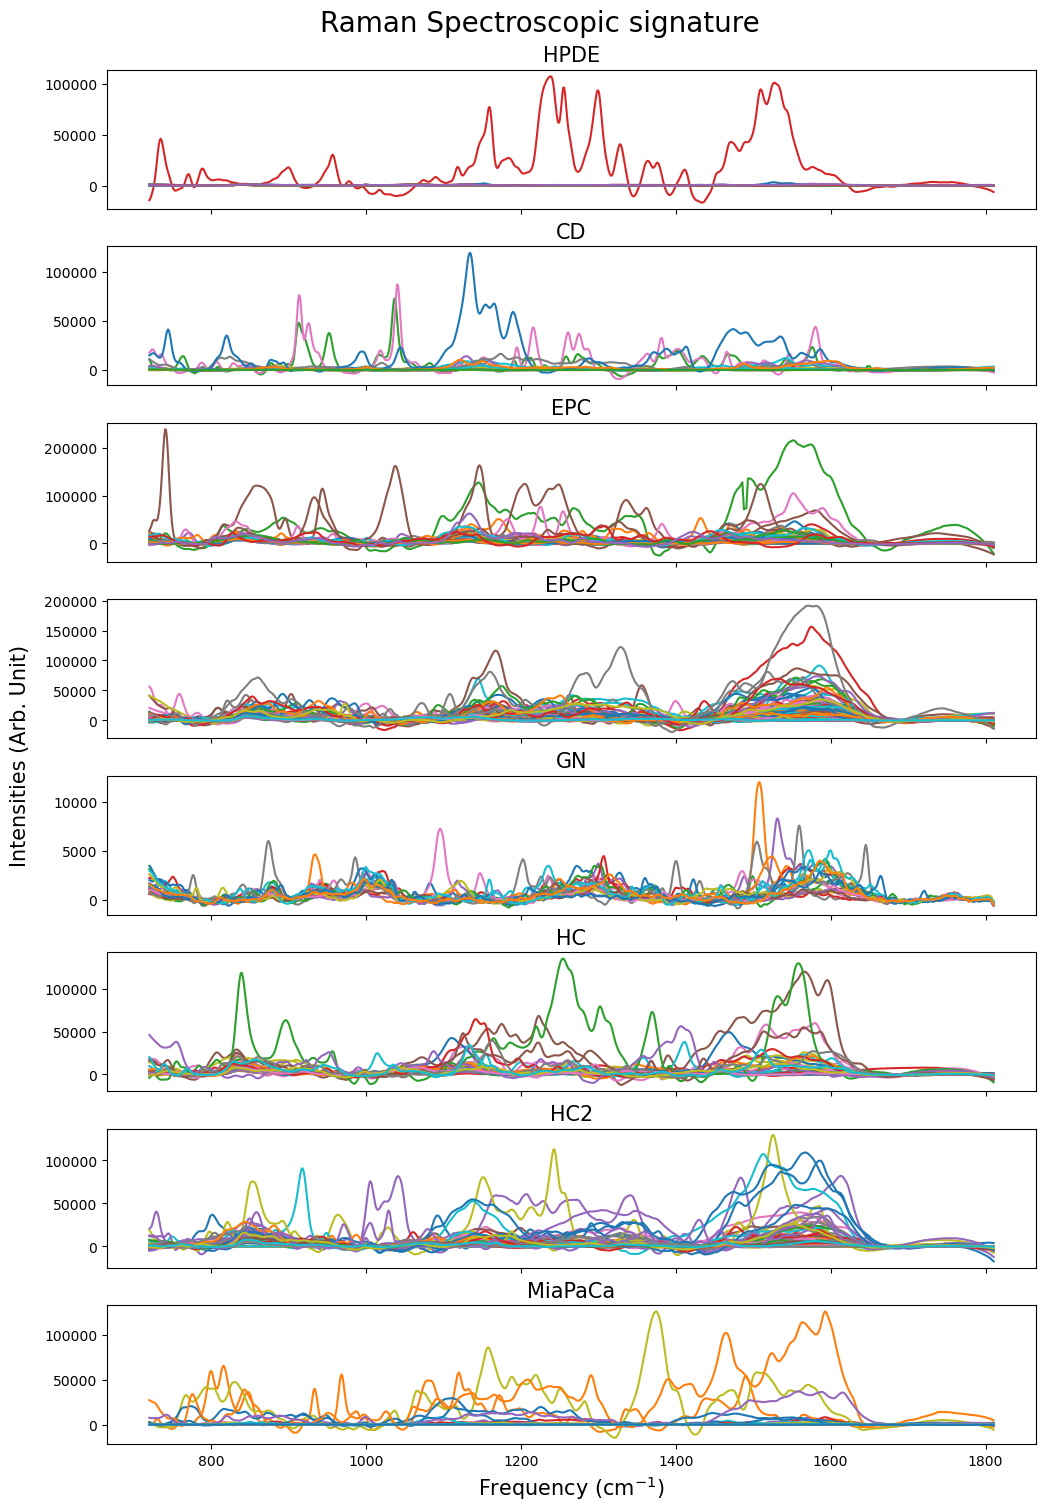

In [54]:
fig, ax = plt.subplots(8,1,sharex=True,sharey=False,layout="constrained")
plt.rcParams['figure.figsize'] = 10, 15
#plt.subplots_adjust(left=0.1, bottom=0.1, right**=**0.9,top=0.9, wspace=0.4,hspace=0.4)
pd.option_context('mode.use_inf_as_na', True)
fig.suptitle('Raman Spectroscopic signature', fontsize = 20)
for i in range(df_raw_HPDE.shape[1]):
    ax[0].plot(df_frequency,df_raw_HPDE.iloc[:,i],label='HPDE')
    ax[0].set_title('HPDE',fontsize=15)
for i in range(df_raw_CD.shape[1]):
    ax[1].plot(df_frequency,df_raw_CD.iloc[:,i],label='CD')
    ax[1].set_title('CD',fontsize=15)
for i in range(df_raw_EPC.shape[1]):
    ax[2].plot(df_frequency,df_raw_EPC.iloc[:,i],label='EPC')
    ax[2].set_title('EPC',fontsize=15)
for i in range(df_raw_EPC2.shape[1]):
    ax[3].plot(df_frequency,df_raw_EPC2.iloc[:,i],label='EPC2')
    ax[3].set_title('EPC2',fontsize=15)
for i in range(df_raw_GN.shape[1]):
    ax[4].plot(df_frequency,df_raw_GN.iloc[:,i],label='GN')
    ax[4].set_title('GN',fontsize=15)
for i in range(df_raw_HC.shape[1]):
    ax[5].plot(df_frequency,df_raw_HC.iloc[:,i],label='HC')
    ax[5].set_title('HC',fontsize=15)
for i in range(df_raw_HC2.shape[1]):
    ax[6].plot(df_frequency,df_raw_HC2.iloc[:,i],label='HC2')
    ax[6].set_title('HC2',fontsize=15)
for i in range(df_raw_MiaPaCa.shape[1]):
    ax[7].plot(df_frequency,df_raw_MiaPaCa.iloc[:,i],label='MiaPaCa')
    ax[7].set_title('MiaPaCa',fontsize=15)

plt.gcf().text(-0.02,0.5, "Intensities (Arb. Unit)", ha="center", va="center", rotation=90, fontsize=15)
plt.xlabel(r'Frequency (cm$^{-1}$)',fontsize=15)
#plt.legend()
#plt.tight_layout()
plt.show()

**Note:** Here, HPDE, CD, MiaPaCa, and GN are exosomes from different cells, which are identified as a marker for pancreatic cancer cells. HC are the cells from healthy control group and EPC are the early pancreatic cancer cell group. 

The author uses Vancouver Raman algorithm to remove flourescence by fitting the polynomial regression. Also, there are modified Vancouver Raman algorithm to denoise, correct baseline (fitting the flourescence), and so on. The author also normalizes the spectra as well. 

In [55]:
df_scaled_CD = pd.read_csv(r'Data\Scaled CD18.txt',sep='\s+',header=None)
print(df_scaled_CD.shape)
df_scaled_CD.columns = ['CD_scaled_'+str(i) for i in range(df_scaled_CD.shape[1])]
df_scaled_CD.head()

(1014, 33)


CD_scaled_0  CD_scaled_1  CD_scaled_2  CD_scaled_3  CD_scaled_4  \
0     0.627240    -0.808440     0.785649    -0.286407     1.117742   
1     0.544890    -0.803976     0.580486    -0.284544     0.951922   
2     0.486031    -0.757946     0.422489    -0.289928     0.876549   
3     0.504072    -0.729041     0.117898    -0.273608     0.795501   
4     0.497984    -0.714085    -0.109961    -0.283588     0.748358   

   CD_scaled_5  CD_scaled_6  CD_scaled_7  CD_scaled_8  CD_scaled_9  ...  \
0     1.198693     0.783460     0.269363    -0.011685    -0.814099  ...   
1     1.171875     0.859946     0.117320    -0.017348    -0.833708  ...   
2     1.101364     0.934400     0.049795    -0.011968    -0.836117  ...   
3     1.084714     1.061655     0.024158    -0.046767    -0.853397  ...   
4     0.991662     1.127355    -0.111128    -0.060305    -0.851067  ...   

   CD_scaled_23  CD_scaled_24  CD_scaled_25  CD_scaled_26  CD_scaled_27  \
0      3.614682      0.793426      5.294379      2.974757      2.181770   
1      3.721372      0.783691      4.771051      2.938056      1.990713   
2      3.828628      0.786220      4.479207      2.888274      1.819568   
3      3.807108      0.793976      4.364357      2.846810      1.569697   
4      3.816864      0.805368      4.237218      2.709478      1.374390   

   CD_scaled_28  CD_scaled_29  CD_scaled_30  CD_scaled_31  CD_scaled_32  
0      3.626305      0.989208      0.081365     -0.699944      5.020930  
1      3.608480      1.170498      0.098765     -0.718982      4.903327  
2      3.488046      1.335950      0.118705     -0.742587      4.659306  
3      3.512828      1.613569      0.161349     -0.757534      4.446844  
4      3.548538      1.681663      0.193972     -0.781588      4.213111  

[5 rows x 33 columns]

In [56]:
df_scaled_GN = pd.read_csv(r'Data\Scaled GN.txt',sep='\s+',header=None)
print(df_scaled_GN.shape)
df_scaled_GN.columns = ['GN_scaled_'+str(i) for i in range(df_scaled_GN.shape[1])]
df_scaled_GN.head()

(1014, 22)


GN_scaled_0  GN_scaled_1  GN_scaled_2  GN_scaled_3  GN_scaled_4  \
0     1.605200     0.480491     4.279952     1.537541     0.646067   
1     1.478035     0.468102     4.243459     1.456568     0.628288   
2     1.415687     0.435763     4.154088     1.423301     0.610606   
3     1.373109     0.421543     3.952214     1.404418     0.576885   
4     1.313476     0.386261     3.738269     1.377033     0.483284   

   GN_scaled_5  GN_scaled_6  GN_scaled_7  GN_scaled_8  GN_scaled_9  ...  \
0     1.565064     0.839120     0.641616     1.293977     0.680262  ...   
1     1.634938     0.774027     0.578849     1.094202     0.596664  ...   
2     1.654515     0.749243     0.543971     0.947084     0.589395  ...   
3     1.804510     0.695163     0.503187     0.802163     0.486022  ...   
4     1.800878     0.649300     0.476363     0.584689     0.359211  ...   

   GN_scaled_12  GN_scaled_13  GN_scaled_14  GN_scaled_15  GN_scaled_16  \
0      0.572399      0.810921      3.234632      2.501736      1.417842   
1      0.433070      0.731839      3.273524      2.075808      1.434043   
2      0.333233      0.690918      3.198684      1.876833      1.335939   
3      0.204007      0.645669      3.025929      1.501176      1.282998   
4      0.091412      0.683105      2.775281      1.237185      1.229074   

   GN_scaled_17  GN_scaled_18  GN_scaled_19  GN_scaled_20  GN_scaled_21  
0      0.317277      3.007618      2.281700      1.695935      1.377771  
1      0.297958      2.835588      2.166988      1.634570      1.294449  
2      0.234872      2.700803      2.087374      1.518635      1.244289  
3      0.182967      2.582841      2.002947      1.403997      1.127930  
4      0.165640      2.418848      1.899299      1.391716      1.023547  

[5 rows x 22 columns]

In [57]:
df_scaled_HPDE = pd.read_csv(r'Data\Scaled HPDE.txt',sep='\s+',header=None)
print(df_scaled_HPDE.shape)
df_scaled_HPDE.columns = ['HPDE_scaled_'+str(i) for i in range(df_scaled_HPDE.shape[1])]
df_scaled_HPDE.head()

(1014, 35)


HPDE_scaled_0  HPDE_scaled_1  HPDE_scaled_2  HPDE_scaled_3  HPDE_scaled_4  \
0       2.560051       1.970449       3.037619       3.033875       2.412465   
1       2.381410       1.883087       2.970336       2.969361       2.388290   
2       2.329360       1.859549       2.860879       2.925439       2.232922   
3       2.267373       1.831276       2.774029       2.721611       2.144916   
4       2.068860       1.803762       2.625452       2.603190       1.943666   

   HPDE_scaled_5  HPDE_scaled_6  HPDE_scaled_7  HPDE_scaled_8  HPDE_scaled_9  \
0       2.823622       3.452165       1.805597       3.296075       2.898464   
1       2.764960       3.374450       1.744433       3.162275       2.688602   
2       2.602753       3.234404       1.735840       3.055666       2.616045   
3       2.443454       3.071123       1.719661       3.071351       2.409292   
4       2.354916       3.034961       1.704402       2.961873       2.228518   

   ...  HPDE_scaled_25  HPDE_scaled_26  HPDE_scaled_27  HPDE_scaled_28  \
0  ...        0.594899        2.282256        2.820799        1.766969   
1  ...        0.494378        2.040423        2.688267        1.607042   
2  ...        0.516661        2.055868        2.668853        1.543411   
3  ...        0.384564        1.879769        2.652128        1.545021   
4  ...        0.312958        1.665659        2.612008        1.684299   

   HPDE_scaled_29  HPDE_scaled_30  HPDE_scaled_31  HPDE_scaled_32  \
0        1.576723        0.498329        1.124748        1.941478   
1        1.559853        0.518802        1.205917        1.810946   
2        1.580687        0.442381        1.468947        1.828335   
3        1.515992        0.412792        1.663626        1.746537   
4        1.438083        0.280347        1.668530        1.777790   

   HPDE_scaled_33  HPDE_scaled_34  
0        1.166412        0.235613  
1        1.136220        0.147063  
2        1.163990        0.119143  
3        1.175575       -0.041795  
4        1.257393       -0.049063  

[5 rows x 35 columns]

In [58]:
df_scaled_MiaPaCa = pd.read_csv(r'Data\Scaled MiaPaCa.txt',sep='\s+',header=None)
print(df_scaled_MiaPaCa.shape)
df_scaled_MiaPaCa.columns = ['MiaPaCa_scaled_'+str(i) for i in range(df_scaled_MiaPaCa.shape[1])]
df_scaled_MiaPaCa.head()

(1014, 31)


MiaPaCa_scaled_0  MiaPaCa_scaled_1  MiaPaCa_scaled_2  MiaPaCa_scaled_3  \
0          2.279001         -0.493665         -0.837637         -0.675826   
1          2.224572         -0.546858         -0.902667         -0.705791   
2          2.141597         -0.569704         -0.849027         -0.727031   
3          2.112681         -0.629354         -0.723450         -0.749285   
4          2.010547         -0.641432         -0.771103         -0.759530   

   MiaPaCa_scaled_4  MiaPaCa_scaled_5  MiaPaCa_scaled_6  MiaPaCa_scaled_7  \
0         -0.654590          0.827089         -0.310579         -0.794842   
1         -0.653416          0.820007         -0.322965         -0.782919   
2         -0.630418          0.755663         -0.278471         -0.759654   
3         -0.590760          0.629385         -0.150431         -0.674885   
4         -0.568444          0.562125          0.016198         -0.639184   

   MiaPaCa_scaled_8  MiaPaCa_scaled_9  ...  MiaPaCa_scaled_21  \
0         -0.667363          0.306805  ...           0.002890   
1         -0.694757          0.262347  ...          -0.034115   
2         -0.716747          0.203500  ...          -0.060101   
3         -0.745962          0.133052  ...          -0.079730   
4         -0.769380          0.051186  ...          -0.094101   

   MiaPaCa_scaled_22  MiaPaCa_scaled_23  MiaPaCa_scaled_24  MiaPaCa_scaled_25  \
0           1.455419           1.612946          -0.048173           3.220945   
1           1.415905           1.455756          -0.078448           3.162044   
2           1.349793           1.395624          -0.094257           3.189273   
3           1.351175           1.323308          -0.112559           3.036901   
4           1.305004           1.281904          -0.115781           3.013851   

   MiaPaCa_scaled_26  MiaPaCa_scaled_27  MiaPaCa_scaled_28  MiaPaCa_scaled_29  \
0           2.680854           2.322535          -0.178839          -0.795637   
1           2.679886           2.129003          -0.261592          -0.769948   
2           2.543733           2.073219          -0.317903          -0.788373   
3           2.501903           2.012246          -0.280749          -0.877399   
4           2.338906           1.941912          -0.317927          -0.825410   

   MiaPaCa_scaled_30  
0           1.208965  
1           1.266487  
2           1.286535  
3           1.292390  
4           1.185780  

[5 rows x 31 columns]

Same with the scaled data. We will need to reduce the dimension from 1014 to 1013.

In [59]:
df_scaled_CD.drop([0],inplace=True)
df_scaled_GN.drop([0],inplace=True)
df_scaled_HPDE.drop([0],inplace=True)
df_scaled_MiaPaCa.drop([0],inplace=True)

In [60]:
print(df_scaled_CD.shape)
print(df_scaled_GN.shape)
print(df_scaled_HPDE.shape)
print(df_scaled_MiaPaCa.shape)

(1013, 33)
(1013, 22)
(1013, 35)
(1013, 31)


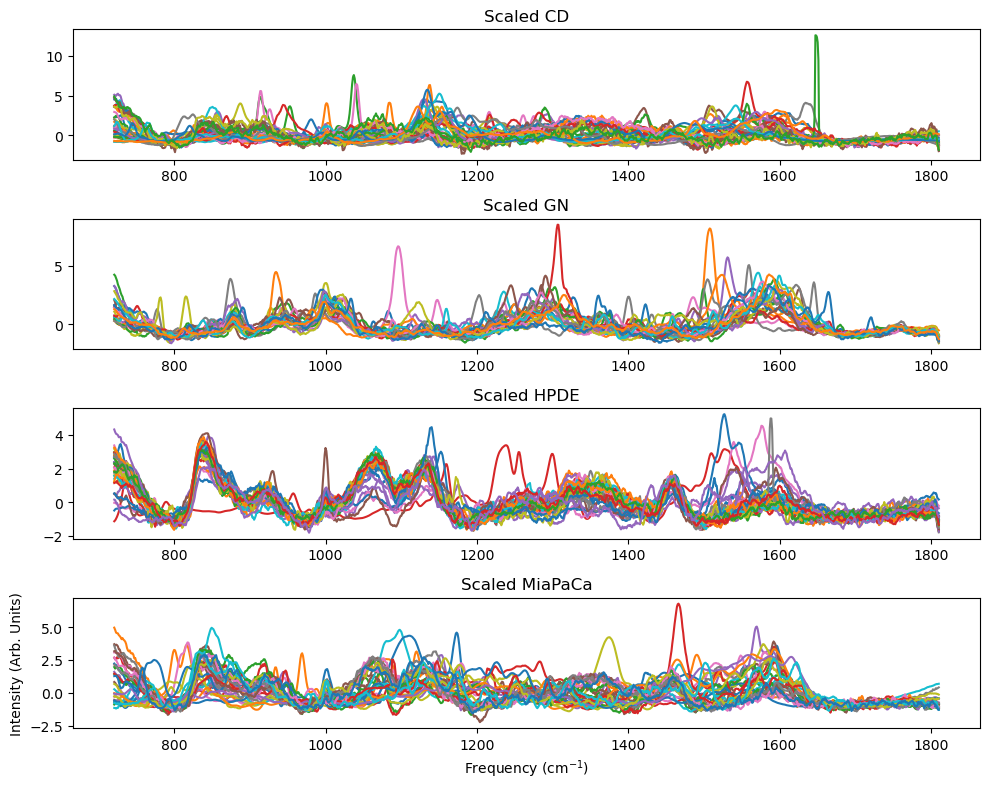

In [61]:
fig, ax = plt.subplots(4,1,figsize=(10,8))
ax[0].plot(df_average.Raman.Frequency, df_scaled_CD[:])
ax[0].set_title('Scaled CD')
ax[1].plot(df_average.Raman.Frequency, df_scaled_GN[:])
ax[1].set_title('Scaled GN')
ax[2].plot(df_average.Raman.Frequency, df_scaled_HPDE[:])
ax[2].set_title('Scaled HPDE')
ax[3].plot(df_average.Raman.Frequency, df_scaled_MiaPaCa[:])
ax[3].set_title('Scaled MiaPaCa')
plt.ylabel('Intensity (Arb. Units)')
plt.xlabel('Frequency (cm$^{-1}$)')
plt.tight_layout()
plt.show()

It appears that the spectra do not need much cleaning from here. We will use the scaled spectra to move forward and reduce the dimension by applying PCA. However, we might need to create a label and concatenate all of the spectra of different cells. 

In [62]:
df = pd.concat([df_scaled_CD,df_scaled_GN,df_scaled_HPDE,df_scaled_MiaPaCa],axis=1).reset_index()
df.drop('index',axis=1,inplace=True)
print(df.shape)
df.head(200)

(1013, 121)


CD_scaled_0  CD_scaled_1  CD_scaled_2  CD_scaled_3  CD_scaled_4  \
0       0.544890    -0.803976     0.580486    -0.284544     0.951922   
1       0.486031    -0.757946     0.422489    -0.289928     0.876549   
2       0.504072    -0.729041     0.117898    -0.273608     0.795501   
3       0.497984    -0.714085    -0.109961    -0.283588     0.748358   
4       0.211190    -0.695870    -0.257283    -0.281549     0.596884   
..           ...          ...          ...          ...          ...   
195    -0.893031    -0.421444     3.289723    -0.411183    -0.731459   
196    -0.801298    -0.385343     3.583743    -0.450027    -0.745795   
197    -0.685285    -0.265187     3.652794    -0.456610    -0.811388   
198    -0.692354    -0.209580     3.485891    -0.449744    -0.828974   
199    -0.638331    -0.161362     3.094565    -0.454888    -0.820842   

     CD_scaled_5  CD_scaled_6  CD_scaled_7  CD_scaled_8  CD_scaled_9  ...  \
0       1.171875     0.859946     0.117320    -0.017348    -0.833708  ...   
1       1.101364     0.934400     0.049795    -0.011968    -0.836117  ...   
2       1.084714     1.061655     0.024158    -0.046767    -0.853397  ...   
3       0.991662     1.127355    -0.111128    -0.060305    -0.851067  ...   
4       1.057551     1.110658    -0.195160    -0.077421    -0.846064  ...   
..           ...          ...          ...          ...          ...  ...   
195    -0.291710    -0.487217    -0.201324    -0.602747    -0.189978  ...   
196    -0.324891    -0.542334    -0.164296    -0.693464    -0.152620  ...   
197    -0.319551    -0.589782    -0.192672    -0.738451    -0.127901  ...   
198    -0.311102    -0.623126    -0.175801    -0.779504    -0.124896  ...   
199    -0.200330    -0.634639    -0.142212    -0.842001    -0.108719  ...   

     MiaPaCa_scaled_21  MiaPaCa_scaled_22  MiaPaCa_scaled_23  \
0            -0.034115           1.415905           1.455756   
1            -0.060101           1.349793           1.395624   
2            -0.079730           1.351175           1.323308   
3            -0.094101           1.305004           1.281904   
4            -0.108735           1.188868           1.177508   
..                 ...                ...                ...   
195          -0.520487          -0.090672          -0.583555   
196          -0.517873          -0.085111          -0.515748   
197          -0.530992           0.058748          -0.427158   
198          -0.542873           0.060938          -0.395398   
199          -0.560231          -0.166134          -0.471920   

     MiaPaCa_scaled_24  MiaPaCa_scaled_25  MiaPaCa_scaled_26  \
0            -0.078448           3.162044           2.679886   
1            -0.094257           3.189273           2.543733   
2            -0.112559           3.036901           2.501903   
3            -0.115781           3.013851           2.338906   
4            -0.113850           3.011169           2.202445   
..                 ...                ...                ...   
195          -0.818062          -0.747619          -0.013379   
196          -0.840648          -0.945677          -0.202091   
197          -0.861757          -0.972070          -0.289541   
198          -0.893249          -0.867037          -0.316119   
199          -0.918029          -0.923572          -0.453956   

     MiaPaCa_scaled_27  MiaPaCa_scaled_28  MiaPaCa_scaled_29  \
0             2.129003          -0.261592          -0.769948   
1             2.073219          -0.317903          -0.788373   
2             2.012246          -0.280749          -0.877399   
3             1.941912          -0.317927          -0.825410   
4             1.800809          -0.421874          -0.803173   
..                 ...                ...                ...   
195          -0.688681          -0.605225          -0.406731   
196          -0.665073          -0.524072          -0.537870   
197          -0.645025          -0.452875          -0.648226   
198          -0.642546          -0.59

Now we can create a label for these concatenated df for classification.

In [63]:
cd_obs = df_scaled_CD.shape[1]
GN_obs = df_scaled_GN.shape[1]
HPDE_obs = df_scaled_HPDE.shape[1]
MiaPaCa_obs = df_scaled_MiaPaCa.shape[1]
y = {}
for i in range(cd_obs):
    name = 'CD_scaled_' + str(i)
    y[name] = 0
for i in range(GN_obs):
    name = 'GN_scaled_' + str(i)
    y[name] = 1
for i in range(HPDE_obs):
    name = 'HPDE_scaled_' + str(i)
    y[name] = 2
for i in range(MiaPaCa_obs):
    name = 'MiaPaCa_scaled_' + str(i)
    y[name] = 3
y = pd.DataFrame.from_dict(y,orient='index',columns=['Target'])
y.shape

(121, 1)

In [64]:
y.head()

Target
CD_scaled_0       0
CD_scaled_1       0
CD_scaled_2       0
CD_scaled_3       0
CD_scaled_4       0

Then we can merge this to the main df.

In [65]:
df_master = pd.concat([df.T,y],axis=1,ignore_index=False)

In [66]:
df_master

0         1         2         3         4         5  \
CD_scaled_0        0.544890  0.486031  0.504072  0.497984  0.211190  0.085117   
CD_scaled_1       -0.803976 -0.757946 -0.729041 -0.714085 -0.695870 -0.695353   
CD_scaled_2        0.580486  0.422489  0.117898 -0.109961 -0.257283 -0.344626   
CD_scaled_3       -0.284544 -0.289928 -0.273608 -0.283588 -0.281549 -0.298788   
CD_scaled_4        0.951922  0.876549  0.795501  0.748358  0.596884  0.605710   
...                     ...       ...       ...       ...       ...       ...   
MiaPaCa_scaled_26  2.679886  2.543733  2.501903  2.338906  2.202445  2.012167   
MiaPaCa_scaled_27  2.129003  2.073219  2.012246  1.941912  1.800809  1.691090   
MiaPaCa_scaled_28 -0.261592 -0.317903 -0.280749 -0.317927 -0.421874 -0.358944   
MiaPaCa_scaled_29 -0.769948 -0.788373 -0.877399 -0.825410 -0.803173 -0.862064   
MiaPaCa_scaled_30  1.266487  1.286535  1.292390  1.185780  1.083188  0.816319   

                          6         7         8         9  ...      1004  \
CD_scaled_0       -0.011104 -0.244996 -0.269232 -0.100159  ...  0.234435   
CD_scaled_1       -0.768268 -0.823698 -0.867106 -0.903477  ... -0.429063   
CD_scaled_2       -0.403054 -0.445152 -0.461131 -0.471701  ... -0.624187   
CD_scaled_3       -0.296297 -0.344452 -0.392090 -0.373874  ...  0.202230   
CD_scaled_4        0.579334  0.585846  0.485756  0.532293  ... -0.673613   
...                     ...       ...       ...       ...  ...       ...   
MiaPaCa_scaled_26  2.038291  2.055618  2.057747  2.089668  ... -1.038924   
MiaPaCa_scaled_27  1.653938  1.576651  1.452387  1.455146  ... -0.815540   
MiaPaCa_scaled_28 -0.403064 -0.504370 -0.726259 -0.746632  ... -0.429636   
MiaPaCa_scaled_29 -0.846209 -0.797101 -0.837419 -0.887668  ... -0.768990   
MiaPaCa_scaled_30  0.553298  0.345825  0.371942  0.379366  ... -0.679566   

                       1005      1006      1007      1008      1009      1010  \
CD_scaled_0        0.293614  0.287794  0.218139  0.202670  0.143649 -0.188851   
CD_scaled_1       -0.413083 -0.404201 -0.431803 -0.452528 -0.496689 -0.571386   
CD_scaled_2       -0.628112 -0.636051 -0.642628 -0.646459 -0.653747 -0.673928   
CD_scaled_3        0.179256  0.182211  0.202127  0.219839  0.230545  0.105348   
CD_scaled_4       -0.711815 -0.719791 -0.655058 -0.607814 -0.677480 -0.896293   
...                     ...       ...       ...       ...       ...       ...   
MiaPaCa_scaled_26 -0.871064 -0.831789 -0.792699 -0.814054 -0.847574 -1.017860   
MiaPaCa_scaled_27 -0.797810 -0.699646 -0.699399 -0.792807 -0.673847 -0.840130   
MiaPaCa_scaled_28 -0.443264 -0.500121 -0.559249 -0.489456 -0.431647 -0.500564   
MiaPaCa_scaled_29 -0.643993 -0.655699 -0.694486 -0.677776 -0.715158 -1.061388   
MiaPaCa_scaled_30 -0.804987 -0.846038 -0.911533 -0.948958 -1.035074 -1.189956   

                       1011      1012  Target  
CD_scaled_0       -0.338167 -0.343832       0  
CD_scaled_1       -0.594077 -0.610955       0  
CD_scaled_2       -0.681869 -0.695268       0  
CD_scaled_3        0.095563  0.021590       0  
CD_scaled_4       -0.905580 -1.059267       0  
...                     ...       ...     ...  
MiaPaCa_scaled_26 -1.033726 -1.074580       3  
MiaPaCa_scaled_27 -0.843650 -0.801993       3  
MiaPaCa_scaled_28 -0.501574 -0.445481       3  
MiaPaCa_scaled_29 -1.113616 -1.302723       3  
MiaPaCa_scaled_30 -1.290298 -1.297413       3  

[121 rows x 1014 columns]

The author uses PCA to reduce the dimension and has reported values of variance and plots that we can compare. Let us see whether we can reproduce their findings.

In [67]:
from sklearn.decomposition import PCA
df_master.columns = df_master.columns.astype(str)
pca_df = PCA().fit(df_master)
#pca_df = PCA().fit(df_master.drop(columns='Target'))

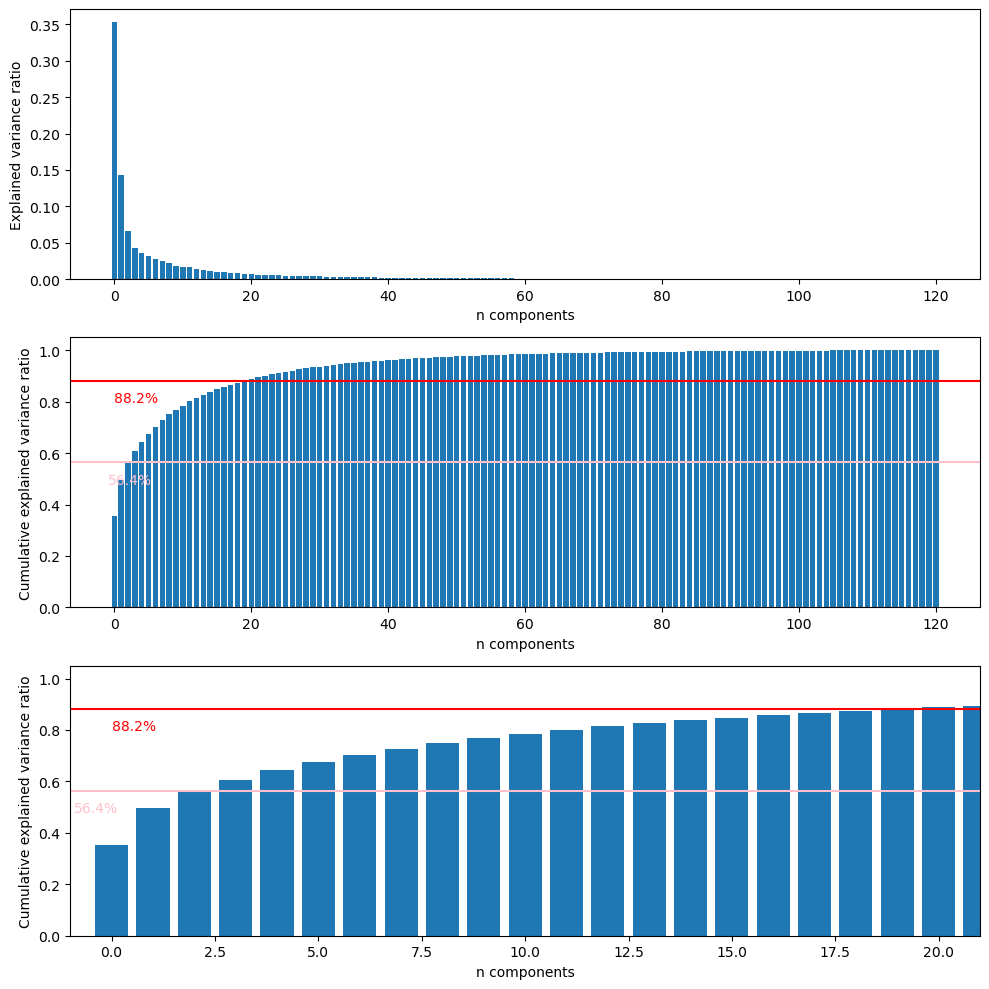

In [68]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].bar(range(len(pca_df.explained_variance_ratio_)),pca_df.explained_variance_ratio_)
ax[1].bar(range(len(pca_df.explained_variance_ratio_)),pca_df.explained_variance_ratio_.cumsum())
ax[0].set_xlabel('n components')
ax[0].set_ylabel('Explained variance ratio')
ax[1].set_xlabel('n components')
ax[1].set_ylabel('Cumulative explained variance ratio')
ax[1].axhline(0.882,c='r')
ax[1].text(0,0.8,'88.2%',c='r')
ax[1].axhline(0.564,c='pink')
ax[1].text(-0.9,0.48,'56.4%',c='pink')

ax[2].bar(range(len(pca_df.explained_variance_ratio_)),pca_df.explained_variance_ratio_.cumsum())
ax[2].set_xlabel('n components')
ax[2].set_ylabel('Cumulative explained variance ratio')
ax[2].axhline(0.882,c='r')
ax[2].text(0,0.8,'88.2%',c='r')
ax[2].axhline(0.564,c='pink')
ax[2].text(-0.9,0.48,'56.4%',c='pink')
ax[2].set_xlim(-1,21)
plt.tight_layout()
plt.show()

This PCA fitting and explained variance ratio results verifies the author's results as well. The first three of PC explains 56.4% of the total variance and 20 PCs explains 88.2% of the total variance. 

In [69]:
pca_df = PCA(n_components=20).fit(df_master.drop(columns='Target'))

In [70]:
X = pca_df.transform(df_master.drop(columns='Target'))

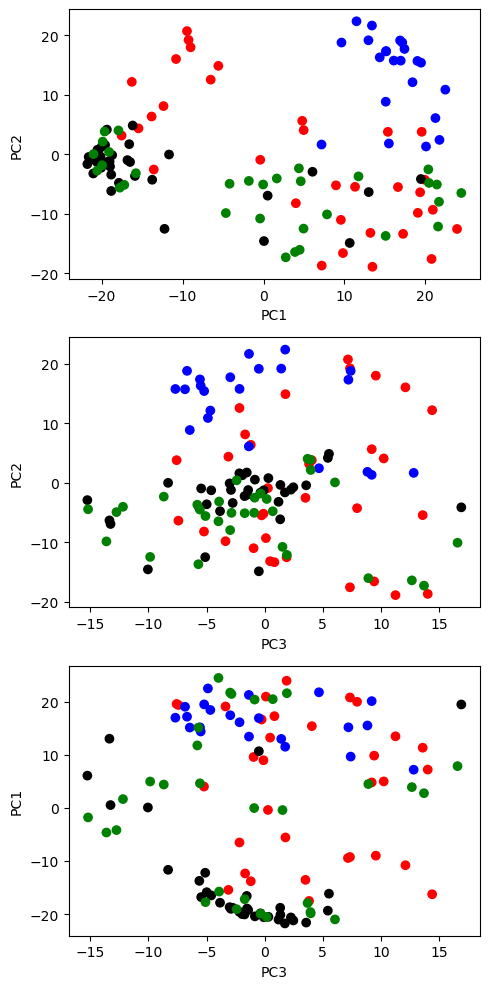

In [71]:
PC1 = X[:,0]
PC2 = X[:,1]
PC3 = X[:,2]

fig, ax = plt.subplots(3,1,figsize=(5,10))
ax[0].scatter(PC1,PC2,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].scatter(PC3,PC2,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[1].set_xlabel('PC3')
ax[1].set_ylabel('PC2')
ax[2].scatter(PC3,PC1,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[2].set_xlabel('PC3')
ax[2].set_ylabel('PC1')
plt.tight_layout()
plt.show()

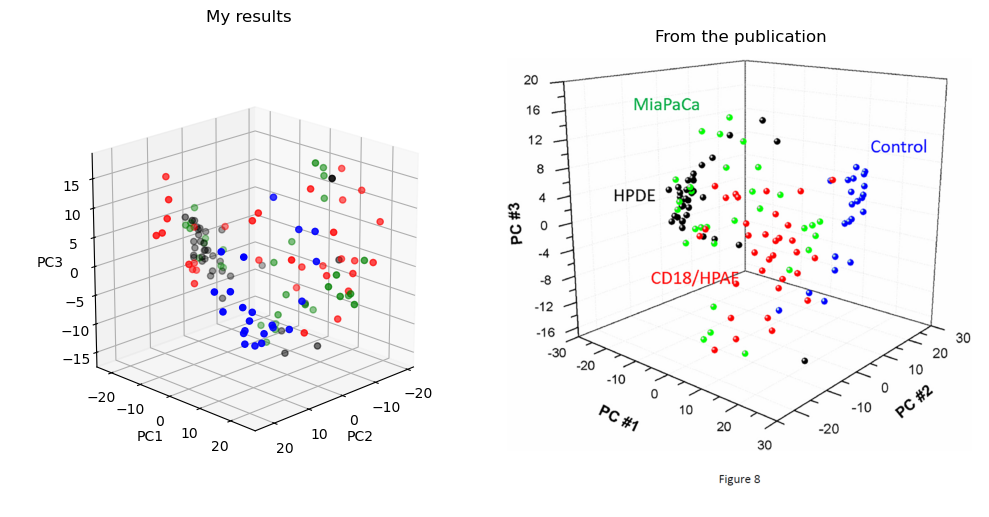

In [72]:
from PIL import Image

PC_fig = Image.open('Data\PC_fig.PNG')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(PC2,PC1,PC3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax.set(xlabel=('PC2'), ylabel=('PC1'), zlabel=('PC3'))
plt.tight_layout()
ax.set_box_aspect(aspect=(4,4,4), zoom=0.8)
ax.view_init(elev=20, azim=45)
ax.set_title('My results')

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(PC_fig)
ax1.axis(False)
ax1.set_title('From the publication')
plt.show()

These plots do not seem to agree with the results in the paper. However, the explained variance ratio is perfectly matched, evidenced by their statistical variance description of PC#1, 2, and 3 corresponding to my results.

Now we can try LDA approach to compare the PC-DFA predictive results from the paper. 

In [73]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_master.drop('Target',axis=1),df_master.Target,test_size=0.3,stratify=df_master.Target)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train,y_train.to_numpy().ravel())
score = lda_model.score(X_test,y_test.to_numpy().ravel())
print(score)

0.972972972972973


C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 22 members, which is less than n_splits=24.
  warnings.warn(
C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 22 members, which is less than n_splits=24.
  warnings.warn(


cross-validation scores:  [1.  1.  0.6 1.  1.  1.  0.8 1.  0.8 0.8 0.8 1.  1.  0.8 1.  1.  0.8 1.
 0.8 0.8 1.  0.8 0.8 1. ]
mean cross-validation score:  0.9
Specificity: 
      label  specificity
0       CD     0.954545
1       GN     1.000000
2     HPDE     0.930233
3  MiaPaCa     0.977778
Sensitivity: 
      label  sensitivity
0       CD     0.939394
1       GN     1.000000
2     HPDE     0.971429
3  MiaPaCa     0.709677
Overall Specificity: 
 specificity    0.965639
dtype: float64
Overall Sensitivity: 
 sensitivity    0.905125
dtype: float64


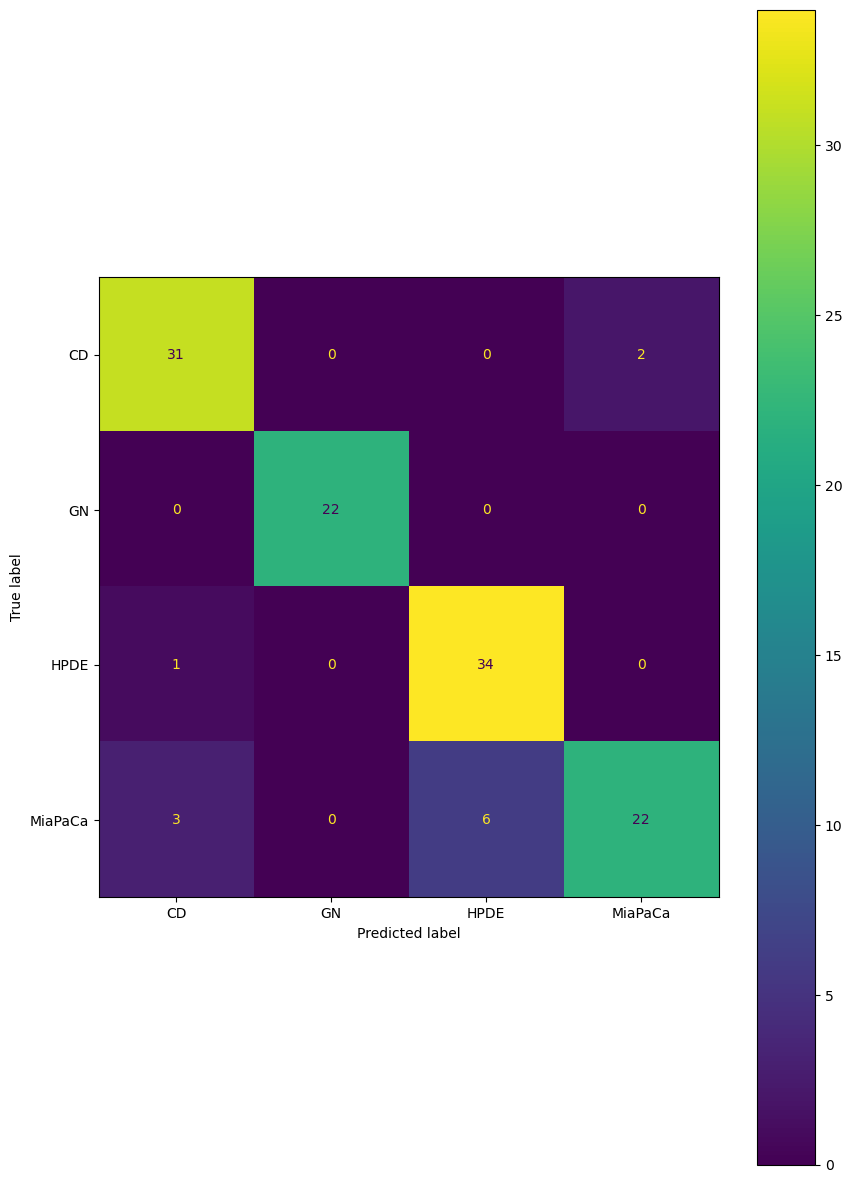

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

split = 24
scores = cross_val_score(lda, X, y.to_numpy().ravel(), cv=split)
print('cross-validation scores: ', scores)
print('mean cross-validation score: ', scores.mean())


y_pred = cross_val_predict(lda, X, y.to_numpy().ravel(), cv=split)
conf_mat = confusion_matrix(y, y_pred,labels=[0,1,2,3])


res = []
for l in [0,1,2,3]:
     prec,recall,_,_ = precision_recall_fscore_support(y.to_numpy().ravel()==l,
                                                       y_pred==l)
     res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')


print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])
print('Overall Specificity: \n', statistics_df[['specificity']].mean())
print('Overall Sensitivity: \n', statistics_df[['sensitivity']].mean())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()

In [76]:
X_lda = lda.fit_transform(X,y.to_numpy().ravel())

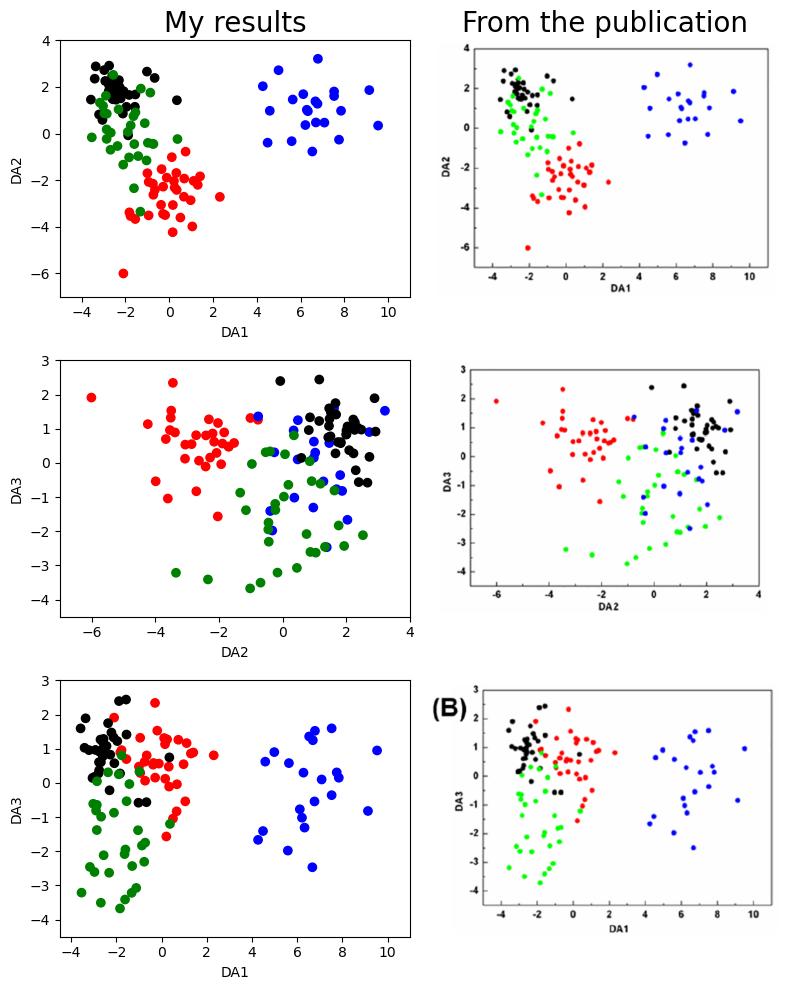

In [77]:
DA12_pubfig = Image.open('Data\DA12.PNG')
DA23_pubfig = Image.open('Data\DA23.PNG')
DA13_pubfig = Image.open('Data\DA13.PNG')

# multiplied by -1 just to reproduce and match their findings.
DA1 = X_lda[:,0]*-1
DA2 = X_lda[:,1]
DA3 = X_lda[:,2]

fig, ax = plt.subplots(3,2,figsize=(8,10))
ax[0,0].set_title('My results',fontsize=20)
ax[0,1].set_title('From the publication',fontsize=20)
ax[0,0].scatter(DA1,DA2,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[0,0].set_xlabel('DA1')
ax[0,0].set_ylabel('DA2')
ax[0,0].set_xlim(-5,11)
ax[0,0].set_ylim(-7,4)
ax[0,1].imshow(DA12_pubfig)
ax[0,1].axis('off')

ax[1,0].scatter(DA2,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[1,0].set_xlabel('DA2')
ax[1,0].set_ylabel('DA3')
ax[1,0].set_xlim(-7,4)
ax[1,0].set_ylim(-4.5,3)
ax[1,1].imshow(DA23_pubfig)
ax[1,1].axis('off')

ax[2,0].scatter(DA1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[2,0].set_xlabel('DA1')
ax[2,0].set_ylabel('DA3')
ax[2,0].set_xlim(-4.5,11)
ax[2,0].set_ylim(-4.5,3)
ax[2,1].imshow(DA13_pubfig)
ax[2,1].axis('off')

plt.tight_layout()
plt.show()

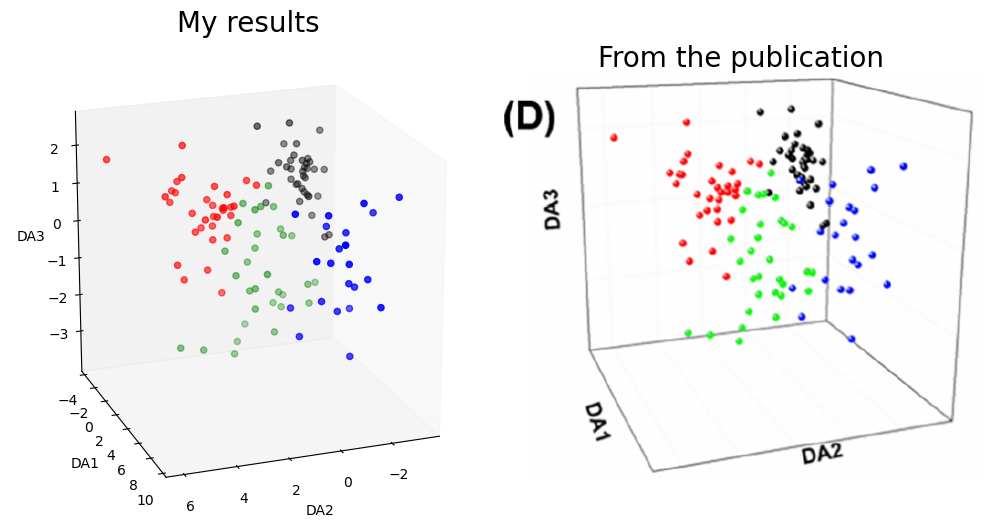

In [78]:
DA123_pubfig = Image.open('Data\DA123.PNG')

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(DA2*-1,DA1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
# multiplied by -1 just to reproduce and match their findings.
ax.set(xlabel=('DA2'), ylabel=('DA1'), zlabel=('DA3'))
plt.tight_layout()
ax.set_box_aspect(aspect=(4,4,4), zoom=1)
ax.view_init(elev=20, azim=70)
ax.grid(False)
ax.set_title('My results',fontsize=20)

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(DA123_pubfig)
ax1.axis(False)
ax1.set_title('From the publication',fontsize=20)
plt.show()

It looks like we can reproduce their results really well. It is bang on. Perfect. <br></br>

Now we can move on to the healthy control and early pancreatic cancer cells. The idea is that if it predicts GN (the control), then it is healthy. If others, it is unhealthy. 

I wonder what would LDA results give without using PCA since LDA also reduces dimension as well. We can find out.

In [79]:
X_train_noPCA, X_test_noPCA, y_train_noPCA, y_test_noPCA = train_test_split(df_master.drop(columns=['Target']),y,test_size=0.3)

lda = LinearDiscriminantAnalysis()
lda_noPCA_model = lda.fit(X_train_noPCA,y_train_noPCA.to_numpy().ravel())
score = lda_noPCA_model.score(X_test_noPCA,y_test_noPCA.to_numpy().ravel())
print(score)

X_lda_noPCA = lda_noPCA_model.transform(df_master.drop(columns=['Target']))

0.8108108108108109


C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 22 members, which is less than n_splits=24.
  warnings.warn(


cross-validation scores:  [0.83333333 0.6        1.         1.         1.         1.
 0.6        0.8        0.8        0.8        0.6        1.
 0.8        0.8        0.8        1.         1.         0.8
 0.6        1.         1.         1.         1.         0.6       ]
mean cross-validation score:  0.8513888888888889


C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 22 members, which is less than n_splits=24.
  warnings.warn(


Specificity: 
      label  specificity
0       CD     0.943182
1       GN     1.000000
2     HPDE     0.918605
3  MiaPaCa     0.933333
Sensitivity: 
      label  sensitivity
0       CD     0.787879
1       GN     1.000000
2     HPDE     0.914286
3  MiaPaCa     0.741935
Overall Specificity: 
 specificity    0.94878
dtype: float64
Overall Sensitivity: 
 sensitivity    0.861025
dtype: float64


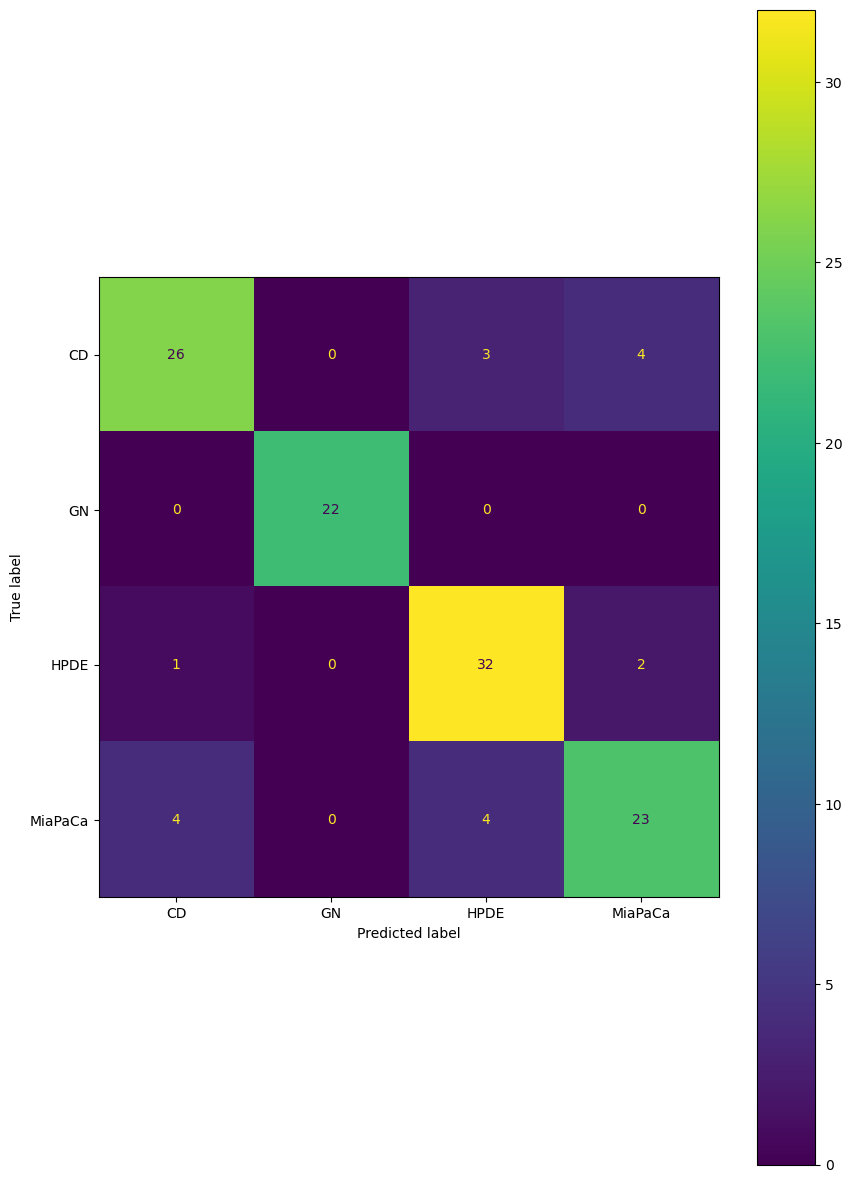

In [80]:
split=24

scores = cross_val_score(lda, df_master.drop(columns=['Target']), y.to_numpy().ravel(), cv=split)
print('cross-validation scores: ', scores)
print('mean cross-validation score: ', scores.mean())


y_pred = cross_val_predict(lda, df_master.drop(columns=['Target']), y.to_numpy().ravel(), cv=split)
conf_mat = confusion_matrix(y, y_pred)


res = []
for l in [0,1,2,3]:
     prec,recall,_,_ = precision_recall_fscore_support(y.to_numpy().ravel()==l,
                                                       y_pred==l)
     res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')

print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])
print('Overall Specificity: \n', statistics_df[['specificity']].mean())
print('Overall Sensitivity: \n', statistics_df[['sensitivity']].mean())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()

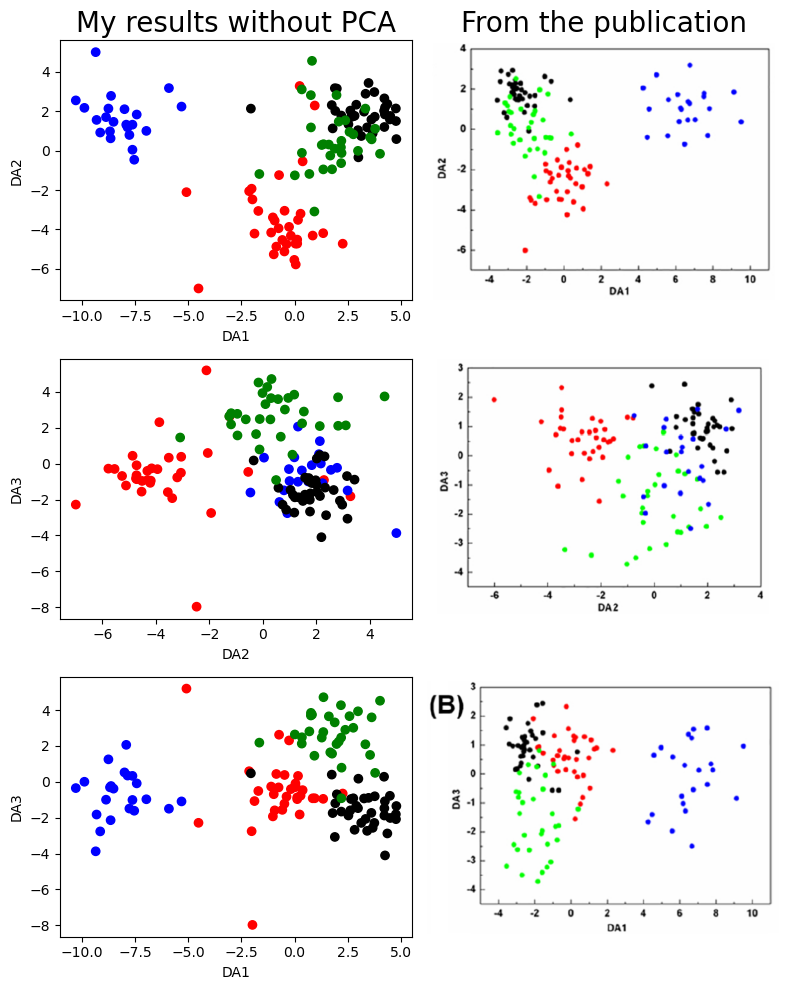

In [81]:
DA1 = X_lda_noPCA[:,0]
DA2 = X_lda_noPCA[:,1]
DA3 = X_lda_noPCA[:,2]

fig, ax = plt.subplots(3,2,figsize=(8,10))
ax[0,0].set_title('My results without PCA',fontsize=20)
ax[0,1].set_title('From the publication',fontsize=20)
ax[0,0].scatter(DA1,DA2*-1,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[0,0].set_xlabel('DA1')
ax[0,0].set_ylabel('DA2')
ax[0,1].imshow(DA12_pubfig)
ax[0,1].axis('off')

ax[1,0].scatter(DA2*-1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[1,0].set_xlabel('DA2')
ax[1,0].set_ylabel('DA3')
ax[1,1].imshow(DA23_pubfig)
ax[1,1].axis('off')

ax[2,0].scatter(DA1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax[2,0].set_xlabel('DA1')
ax[2,0].set_ylabel('DA3')
ax[2,1].imshow(DA13_pubfig)
ax[2,1].axis('off')

plt.tight_layout()
plt.show()

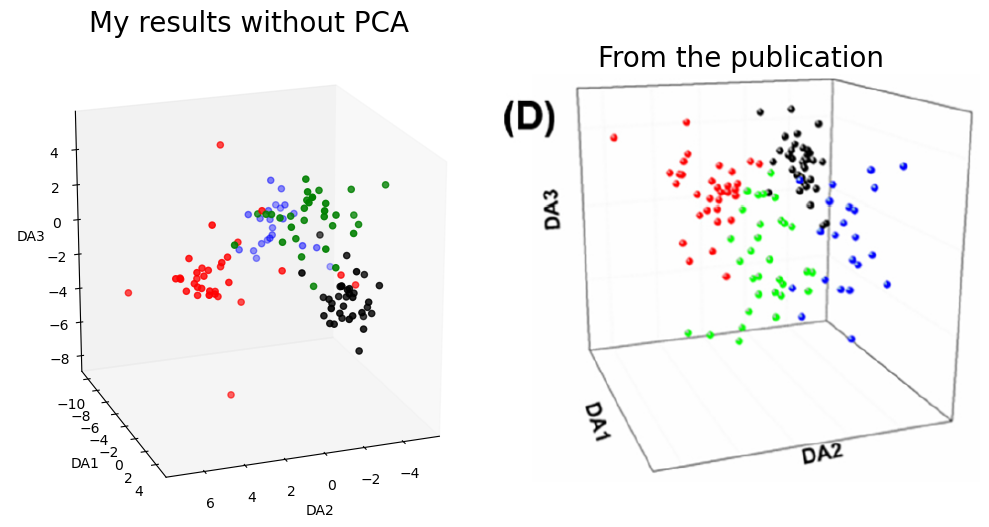

In [82]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,2,1,projection='3d')
ax.scatter(DA2,DA1,DA3,c=df_master.iloc[:,-1].apply(lambda x: 'red' if x==0 else 'blue' if x==1 else 'black' if x==2 else 'green'))
ax.set(xlabel=('DA2'), ylabel=('DA1'), zlabel=('DA3'))
plt.tight_layout()
ax.set_box_aspect(aspect=(4,4,4), zoom=1)
ax.view_init(elev=20, azim=70)
ax.grid(False)
ax.set_title('My results without PCA',fontsize=20)

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(DA123_pubfig)
ax1.axis(False)
ax1.set_title('From the publication',fontsize=20)
plt.show()

We can use different models to experiment whether we can increase the accuracy, specificity, and sensitivity.

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10,100,200],
    'max_features': ["sqrt", "log2",None],
    'max_depth' : [1,2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid,cv=8)
CV_rf.fit(X_train, y_train.to_numpy().ravel())
CV_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 100}

In [84]:
rf = RandomForestClassifier(n_estimators=CV_rf.best_params_['n_estimators'],
                            max_features=CV_rf.best_params_['max_features'],
                            max_depth=CV_rf.best_params_['max_depth'],
                            criterion=CV_rf.best_params_['criterion'])
rf.fit(X_train, y_train.to_numpy().ravel())
rf.score(X_test,y_test)

0.8378378378378378

cross-validation scores:  [0.83333333 0.83333333 0.66666667 0.83333333 0.66666667 1.
 0.5        0.66666667 0.66666667 1.         0.83333333 0.66666667
 0.83333333 0.83333333 1.         0.66666667 0.8        0.8
 1.         0.6        0.6       ]
mean cross-validation score:  0.7761904761904762
Specificity: 
      label  specificity
0       CD     0.886364
1       GN     1.000000
2     HPDE     0.953488
3  MiaPaCa     0.877778
Sensitivity: 
      label  sensitivity
0       CD     0.787879
1       GN     0.863636
2     HPDE     0.800000
3  MiaPaCa     0.741935
Overall Specificity: 
 specificity    0.929407
dtype: float64
Overall Sensitivity: 
 sensitivity    0.798363
dtype: float64


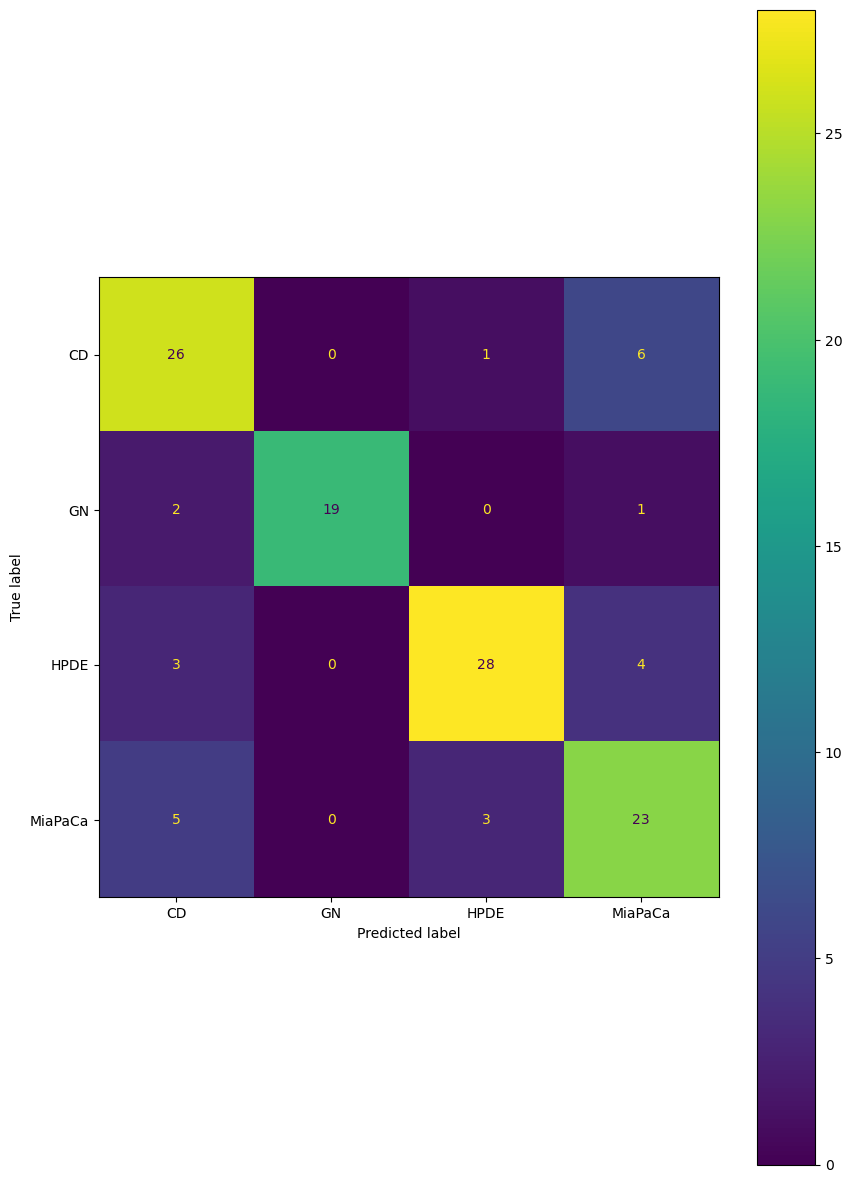

In [85]:
split = 21

scores = cross_val_score(rf, X, y.to_numpy().ravel(), cv=split)
print('cross-validation scores: ', scores)
print('mean cross-validation score: ', scores.mean())


y_pred = cross_val_predict(rf, X, y.to_numpy().ravel(), cv=split)
conf_mat = confusion_matrix(y, y_pred,labels=[0,1,2,3])


res = []
for l in [0,1,2,3]:
     prec,recall,_,_ = precision_recall_fscore_support(y.to_numpy().ravel()==l,
                                                       y_pred==l)
     res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')


print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])
print('Overall Specificity: \n', statistics_df[['specificity']].mean())
print('Overall Sensitivity: \n', statistics_df[['sensitivity']].mean())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()

The random forest classifier model does not score well. LDA seems to perform better with higher accuracy and shorter latency.

cross-validation scores:  [0.66666667 1.         0.83333333 1.         0.66666667 1.
 0.83333333 0.5        0.66666667 0.83333333 0.33333333 0.66666667
 0.83333333 0.83333333 0.66666667 0.83333333 0.8        0.6
 1.         1.         0.8       ]
mean cross-validation score:  0.7793650793650794
Specificity: 
      label  specificity
0       CD     0.852273
1       GN     1.000000
2     HPDE     0.883721
3  MiaPaCa     0.944444
Sensitivity: 
      label  sensitivity
0       CD     0.909091
1       GN     0.954545
2     HPDE     0.828571
3  MiaPaCa     0.419355
Overall Specificity: 
 specificity    0.92011
dtype: float64
Overall Sensitivity: 
 sensitivity    0.777891
dtype: float64


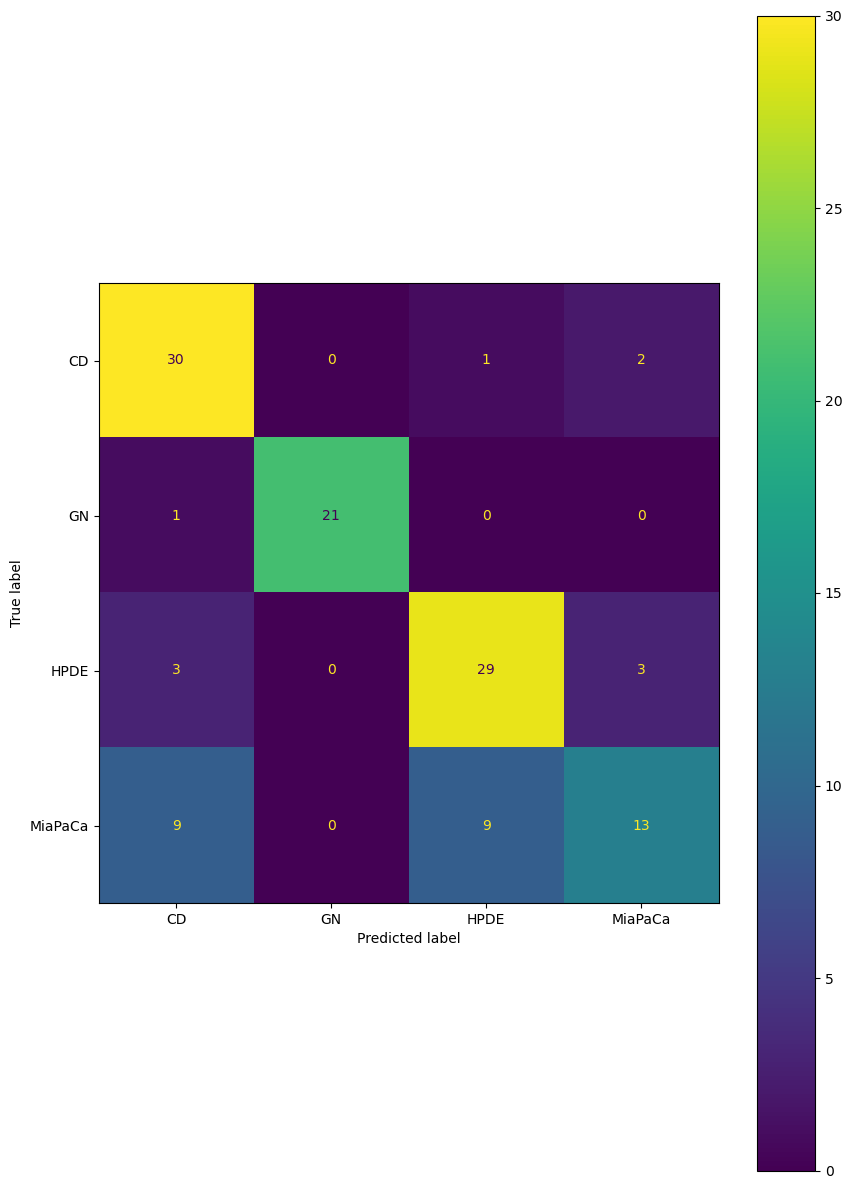

In [86]:
split = 21

scores = cross_val_score(rf, df_master.drop(columns=['Target']), y.to_numpy().ravel(), cv=split)
print('cross-validation scores: ', scores)
print('mean cross-validation score: ', scores.mean())


y_pred = cross_val_predict(rf, df_master.drop(columns=['Target']), y.to_numpy().ravel(), cv=split)
conf_mat = confusion_matrix(y, y_pred,labels=[0,1,2,3])


res = []
for l in [0,1,2,3]:
     prec,recall,_,_ = precision_recall_fscore_support(y.to_numpy().ravel()==l,
                                                       y_pred==l)
     res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')


print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])
print('Overall Specificity: \n', statistics_df[['specificity']].mean())
print('Overall Sensitivity: \n', statistics_df[['sensitivity']].mean())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()

In [87]:
import torch
from torch import nn

In [88]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [175]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(20, 30),
            nn.Linear(30,30),
            nn.Linear(30, 10),
            nn.Linear(10, 4),
            nn.Softmax()
        )

    def forward(self, x):
        x = torch.from_numpy(x).to(torch.float32)
        logits = self.linear_relu_stack(x)
        return logits

def train_loop(X, y, model, epoch, batch, loss_fn, optimizer, printFn=True):
    model.train()
    
    y = turnYinto(y)
    y = torch.tensor(y).to(torch.float32)
    
    loss_plot = []
    plotx = []
    counter = 0
    for i in range(epoch):
        for k in range(X.shape[0]):
            # Compute prediction and loss
            pred = model(X[k,:])
            loss = loss_fn(pred, y[k])
    
            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss = loss.item()
            
            if counter % 10 == 0 and printFn==True:
                print('\n')
                print('epoch {}: '.format(i))
                print('-'*100)
                print(f"{k}/{X.shape[0]} ----> loss: {loss:>7f}")
            else:
                pass
            
            loss_plot.append(loss)
            counter += 1
            plotx.append(counter)
    if printFn==True:
        plt.plot(plotx,loss_plot)
        plt.xlabel('loss')
        plt.ylabel('iterations')
        plt.show()
    else:
        pass
    return loss, plotx

def testing(X_test,y_test,model,printFn=True):
    correct = 0
    preds = []
    for i in range(X_test.shape[0]):
        logits = model(X_test[i,:])
        pred_probab = nn.Softmax(dim=0)(logits)
        y_pred = pred_probab.argmax(0)
        preds.append(y_pred)
        if printFn==True:
            print(f"Predicted class: {y_pred}")
            print(f"Actual class: {y_test[i]}")
        else:
            pass
        t = y_test[i]
        t = int(t)
        if y_pred == t:
            correct += 1
        if printFn==True:
            print('accuracy: ', correct/(i+1))
            print('count: ', correct, '/', (i+1))
            print('-'*100, '\n')
        else:
            pass
    print('Accuracy: ', correct/(i+1))

    return correct/(i+1), preds

def turnYinto(y):
    try:
        Y = []
        for i in y.values:
            if i == 0:
                Y.append([1.0,0.0,0.0,0.0])
            elif i == 1:
                Y.append([0.0,1.0,0.0,0.0])
            elif i == 2:
                Y.append([0.0,0.0,1.0,0.0])
            else:
                Y.append([0.0,0.0,0.0,1.0])
        return np.array(Y)
    except:
        Y = []
        for i in y:
            if i == 0:
                Y.append([1.0,0.0,0.0,0.0])
            elif i == 1:
                Y.append([0.0,1.0,0.0,0.0])
            elif i == 2:
                Y.append([0.0,0.0,1.0,0.0])
            else:
                Y.append([0.0,0.0,0.0,1.0])
        return np.array(Y)
    

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=4, bias=True)
    (4): Softmax(dim=None)
  )
)


epoch 0: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 1.401519


epoch 0: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 1.498910


epoch 0: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 1.252305


epoch 0: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 1.530230


epoch 0: 
----------------------------------------------------------------------------------------------------
40/84 



epoch 7: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.925529


epoch 7: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.783228


epoch 7: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 0.802305


epoch 8: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 1.264992


epoch 8: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.747086


epoch 8: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 0.873678


epoch 8: 
----------------------------------------------------------------------------------------------------
38/84 ----> loss: 0.906361


epoch 8: 
---------



epoch 16: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.747446


epoch 16: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.745357


epoch 16: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743903


epoch 17: 
----------------------------------------------------------------------------------------------------
2/84 ----> loss: 1.032995


epoch 17: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.744350


epoch 17: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.745873


epoch 17: 
----------------------------------------------------------------------------------------------------
32/84 ----> loss: 0.743793


epoch 17: 
-



epoch 25: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 0.743680


epoch 25: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 0.744066


epoch 25: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743673


epoch 25: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.745293


epoch 25: 
----------------------------------------------------------------------------------------------------
40/84 ----> loss: 0.745894


epoch 25: 
----------------------------------------------------------------------------------------------------
50/84 ----> loss: 0.746960


epoch 25: 
----------------------------------------------------------------------------------------------------
60/84 ----> loss: 0.752129


epoch 25: 
-



epoch 32: 
----------------------------------------------------------------------------------------------------
52/84 ----> loss: 0.775482


epoch 32: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.748662


epoch 32: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.809376


epoch 32: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 0.746563


epoch 33: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 0.753226


epoch 33: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.743742


epoch 33: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 0.746594


epoch 33: 
-



epoch 40: 
----------------------------------------------------------------------------------------------------
50/84 ----> loss: 0.744577


epoch 40: 
----------------------------------------------------------------------------------------------------
60/84 ----> loss: 0.748106


epoch 40: 
----------------------------------------------------------------------------------------------------
70/84 ----> loss: 0.743799


epoch 40: 
----------------------------------------------------------------------------------------------------
80/84 ----> loss: 0.743669


epoch 41: 
----------------------------------------------------------------------------------------------------
6/84 ----> loss: 0.743669


epoch 41: 
----------------------------------------------------------------------------------------------------
16/84 ----> loss: 0.743669


epoch 41: 
----------------------------------------------------------------------------------------------------
26/84 ----> loss: 0.746229


epoch 41: 
-



epoch 47: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 0.745051


epoch 48: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 0.748847


epoch 48: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.743704


epoch 48: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 0.743786


epoch 48: 
----------------------------------------------------------------------------------------------------
38/84 ----> loss: 0.748149


epoch 48: 
----------------------------------------------------------------------------------------------------
48/84 ----> loss: 0.743668


epoch 48: 
----------------------------------------------------------------------------------------------------
58/84 ----> loss: 0.743776


epoch 48: 
-



epoch 55: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743669


epoch 55: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743859


epoch 55: 
----------------------------------------------------------------------------------------------------
40/84 ----> loss: 0.744677


epoch 55: 
----------------------------------------------------------------------------------------------------
50/84 ----> loss: 0.744273


epoch 55: 
----------------------------------------------------------------------------------------------------
60/84 ----> loss: 0.745415


epoch 55: 
----------------------------------------------------------------------------------------------------
70/84 ----> loss: 0.743711


epoch 55: 
----------------------------------------------------------------------------------------------------
80/84 ----> loss: 0.743668


epoch 56: 




epoch 62: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.743980


epoch 62: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.754565


epoch 62: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 0.744695


epoch 63: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 0.746765


epoch 63: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.743691


epoch 63: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 0.743698


epoch 63: 
----------------------------------------------------------------------------------------------------
38/84 ----> loss: 0.746320


epoch 63: 
-



epoch 70: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743773


epoch 70: 
----------------------------------------------------------------------------------------------------
40/84 ----> loss: 0.744367


epoch 70: 
----------------------------------------------------------------------------------------------------
50/84 ----> loss: 0.744144


epoch 70: 
----------------------------------------------------------------------------------------------------
60/84 ----> loss: 0.744691


epoch 70: 
----------------------------------------------------------------------------------------------------
70/84 ----> loss: 0.743688


epoch 70: 
----------------------------------------------------------------------------------------------------
80/84 ----> loss: 0.743668


epoch 71: 
----------------------------------------------------------------------------------------------------
6/84 ----> loss: 0.743668


epoch 71: 
-



epoch 77: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.750849


epoch 77: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 0.744436


epoch 78: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 0.745802


epoch 78: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.743683


epoch 78: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 0.743681


epoch 78: 
----------------------------------------------------------------------------------------------------
38/84 ----> loss: 0.745484


epoch 78: 
----------------------------------------------------------------------------------------------------
48/84 ----> loss: 0.743668


epoch 78: 
-



epoch 86: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.743668


epoch 86: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 0.744874


epoch 86: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.744068


epoch 86: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743682


epoch 86: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743668


epoch 87: 
----------------------------------------------------------------------------------------------------
2/84 ----> loss: 0.744601


epoch 87: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743669


epoch 87: 
-



epoch 94: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743942


epoch 94: 
----------------------------------------------------------------------------------------------------
34/84 ----> loss: 0.743668


epoch 94: 
----------------------------------------------------------------------------------------------------
44/84 ----> loss: 0.743677


epoch 94: 
----------------------------------------------------------------------------------------------------
54/84 ----> loss: 0.743871


epoch 94: 
----------------------------------------------------------------------------------------------------
64/84 ----> loss: 0.744093


epoch 94: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 0.743669


epoch 95: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 0.743669


epoch 95: 
-



epoch 102: 
----------------------------------------------------------------------------------------------------
42/84 ----> loss: 0.743681


epoch 102: 
----------------------------------------------------------------------------------------------------
52/84 ----> loss: 0.746259


epoch 102: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.743755


epoch 102: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.748125


epoch 102: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 0.744184


epoch 103: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 0.745040


epoch 103: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.743676


epoch



epoch 109: 
----------------------------------------------------------------------------------------------------
34/84 ----> loss: 0.743668


epoch 109: 
----------------------------------------------------------------------------------------------------
44/84 ----> loss: 0.743674


epoch 109: 
----------------------------------------------------------------------------------------------------
54/84 ----> loss: 0.743840


epoch 109: 
----------------------------------------------------------------------------------------------------
64/84 ----> loss: 0.744004


epoch 109: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 0.743669


epoch 110: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 0.743668


epoch 110: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 0.743839


epoch



epoch 116: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 0.744450


epoch 116: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743928


epoch 116: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743678


epoch 116: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743668


epoch 117: 
----------------------------------------------------------------------------------------------------
2/84 ----> loss: 0.744280


epoch 117: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743669


epoch 117: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.743676


epoch



epoch 124: 
----------------------------------------------------------------------------------------------------
44/84 ----> loss: 0.743673


epoch 124: 
----------------------------------------------------------------------------------------------------
54/84 ----> loss: 0.743817


epoch 124: 
----------------------------------------------------------------------------------------------------
64/84 ----> loss: 0.743946


epoch 124: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 0.743668


epoch 125: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 0.743668


epoch 125: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 0.743806


epoch 125: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743668


epoch



epoch 132: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743669


epoch 132: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.743674


epoch 132: 
----------------------------------------------------------------------------------------------------
32/84 ----> loss: 0.743671


epoch 132: 
----------------------------------------------------------------------------------------------------
42/84 ----> loss: 0.743676


epoch 132: 
----------------------------------------------------------------------------------------------------
52/84 ----> loss: 0.745620


epoch 132: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.743717


epoch 132: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.746661


epoc



epoch 139: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 0.743668


epoch 140: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 0.743668


epoch 140: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 0.743782


epoch 140: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743668


epoch 140: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743694


epoch 140: 
----------------------------------------------------------------------------------------------------
40/84 ----> loss: 0.743915


epoch 140: 
----------------------------------------------------------------------------------------------------
50/84 ----> loss: 0.743913


epoch



epoch 146: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743675


epoch 146: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743668


epoch 147: 
----------------------------------------------------------------------------------------------------
2/84 ----> loss: 0.744112


epoch 147: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743669


epoch 147: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.743673


epoch 147: 
----------------------------------------------------------------------------------------------------
32/84 ----> loss: 0.743670


epoch 147: 
----------------------------------------------------------------------------------------------------
42/84 ----> loss: 0.743674


epoch



epoch 154: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743821


epoch 154: 
----------------------------------------------------------------------------------------------------
34/84 ----> loss: 0.743668


epoch 154: 
----------------------------------------------------------------------------------------------------
44/84 ----> loss: 0.743671


epoch 154: 
----------------------------------------------------------------------------------------------------
54/84 ----> loss: 0.743786


epoch 154: 
----------------------------------------------------------------------------------------------------
64/84 ----> loss: 0.743875


epoch 154: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 0.743668


epoch 155: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 0.743668


epoch



epoch 162: 
----------------------------------------------------------------------------------------------------
2/84 ----> loss: 0.744056


epoch 162: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743669


epoch 162: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.743672


epoch 162: 
----------------------------------------------------------------------------------------------------
32/84 ----> loss: 0.743670


epoch 162: 
----------------------------------------------------------------------------------------------------
42/84 ----> loss: 0.743673


epoch 162: 
----------------------------------------------------------------------------------------------------
52/84 ----> loss: 0.745227


epoch 162: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.743700


epoch



epoch 169: 
----------------------------------------------------------------------------------------------------
64/84 ----> loss: 0.743852


epoch 169: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 0.743668


epoch 170: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 0.743668


epoch 170: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 0.743751


epoch 170: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743668


epoch 170: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743686


epoch 170: 
----------------------------------------------------------------------------------------------------
40/84 ----> loss: 0.743856


epoch



epoch 178: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 0.744298


epoch 178: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.743671


epoch 178: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 0.743669


epoch 178: 
----------------------------------------------------------------------------------------------------
38/84 ----> loss: 0.744155


epoch 178: 
----------------------------------------------------------------------------------------------------
48/84 ----> loss: 0.743668


epoch 178: 
----------------------------------------------------------------------------------------------------
58/84 ----> loss: 0.743683


epoch 178: 
----------------------------------------------------------------------------------------------------
68/84 ----> loss: 0.743668


epoch



epoch 185: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743684


epoch 185: 
----------------------------------------------------------------------------------------------------
40/84 ----> loss: 0.743835


epoch 185: 
----------------------------------------------------------------------------------------------------
50/84 ----> loss: 0.743854


epoch 185: 
----------------------------------------------------------------------------------------------------
60/84 ----> loss: 0.743871


epoch 185: 
----------------------------------------------------------------------------------------------------
70/84 ----> loss: 0.743669


epoch 185: 
----------------------------------------------------------------------------------------------------
80/84 ----> loss: 0.743668


epoch 186: 
----------------------------------------------------------------------------------------------------
6/84 ----> loss: 0.743668


epoch



epoch 193: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.743670


epoch 193: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 0.743669


epoch 193: 
----------------------------------------------------------------------------------------------------
38/84 ----> loss: 0.744099


epoch 193: 
----------------------------------------------------------------------------------------------------
48/84 ----> loss: 0.743668


epoch 193: 
----------------------------------------------------------------------------------------------------
58/84 ----> loss: 0.743681


epoch 193: 
----------------------------------------------------------------------------------------------------
68/84 ----> loss: 0.743668


epoch 193: 
----------------------------------------------------------------------------------------------------
78/84 ----> loss: 0.743836


epoc



epoch 200: 
----------------------------------------------------------------------------------------------------
70/84 ----> loss: 0.743669


epoch 200: 
----------------------------------------------------------------------------------------------------
80/84 ----> loss: 0.743668


epoch 201: 
----------------------------------------------------------------------------------------------------
6/84 ----> loss: 0.743668


epoch 201: 
----------------------------------------------------------------------------------------------------
16/84 ----> loss: 0.743668


epoch 201: 
----------------------------------------------------------------------------------------------------
26/84 ----> loss: 0.743920


epoch 201: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.743668


epoch 201: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 0.744046


epoch



epoch 208: 
----------------------------------------------------------------------------------------------------
48/84 ----> loss: 0.743668


epoch 208: 
----------------------------------------------------------------------------------------------------
58/84 ----> loss: 0.743680


epoch 208: 
----------------------------------------------------------------------------------------------------
68/84 ----> loss: 0.743668


epoch 208: 
----------------------------------------------------------------------------------------------------
78/84 ----> loss: 0.743820


epoch 209: 
----------------------------------------------------------------------------------------------------
4/84 ----> loss: 0.743817


epoch 209: 
----------------------------------------------------------------------------------------------------
14/84 ----> loss: 0.743668


epoch 209: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743773


epoch



epoch 216: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.743668


epoch 216: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 0.744013


epoch 216: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743777


epoch 216: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743672


epoch 216: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743668


epoch 217: 
----------------------------------------------------------------------------------------------------
2/84 ----> loss: 0.743927


epoch 217: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743668


epoch



epoch 223: 
----------------------------------------------------------------------------------------------------
78/84 ----> loss: 0.743806


epoch 224: 
----------------------------------------------------------------------------------------------------
4/84 ----> loss: 0.743804


epoch 224: 
----------------------------------------------------------------------------------------------------
14/84 ----> loss: 0.743668


epoch 224: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743765


epoch 224: 
----------------------------------------------------------------------------------------------------
34/84 ----> loss: 0.743668


epoch 224: 
----------------------------------------------------------------------------------------------------
44/84 ----> loss: 0.743669


epoch 224: 
----------------------------------------------------------------------------------------------------
54/84 ----> loss: 0.743747


epoch



epoch 230: 
----------------------------------------------------------------------------------------------------
70/84 ----> loss: 0.743669


epoch 230: 
----------------------------------------------------------------------------------------------------
80/84 ----> loss: 0.743668


epoch 231: 
----------------------------------------------------------------------------------------------------
6/84 ----> loss: 0.743668


epoch 231: 
----------------------------------------------------------------------------------------------------
16/84 ----> loss: 0.743668


epoch 231: 
----------------------------------------------------------------------------------------------------
26/84 ----> loss: 0.743878


epoch 231: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.743668


epoch 231: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 0.743985


epoch



epoch 238: 
----------------------------------------------------------------------------------------------------
68/84 ----> loss: 0.743668


epoch 238: 
----------------------------------------------------------------------------------------------------
78/84 ----> loss: 0.743794


epoch 239: 
----------------------------------------------------------------------------------------------------
4/84 ----> loss: 0.743793


epoch 239: 
----------------------------------------------------------------------------------------------------
14/84 ----> loss: 0.743668


epoch 239: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743757


epoch 239: 
----------------------------------------------------------------------------------------------------
34/84 ----> loss: 0.743668


epoch 239: 
----------------------------------------------------------------------------------------------------
44/84 ----> loss: 0.743669


epoch



epoch 246: 
----------------------------------------------------------------------------------------------------
6/84 ----> loss: 0.743668


epoch 246: 
----------------------------------------------------------------------------------------------------
16/84 ----> loss: 0.743668


epoch 246: 
----------------------------------------------------------------------------------------------------
26/84 ----> loss: 0.743862


epoch 246: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.743668


epoch 246: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 0.743961


epoch 246: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743760


epoch 246: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743672


epoch



epoch 253: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 0.743669


epoch 253: 
----------------------------------------------------------------------------------------------------
38/84 ----> loss: 0.743957


epoch 253: 
----------------------------------------------------------------------------------------------------
48/84 ----> loss: 0.743668


epoch 253: 
----------------------------------------------------------------------------------------------------
58/84 ----> loss: 0.743677


epoch 253: 
----------------------------------------------------------------------------------------------------
68/84 ----> loss: 0.743668


epoch 253: 
----------------------------------------------------------------------------------------------------
78/84 ----> loss: 0.743784


epoch 254: 
----------------------------------------------------------------------------------------------------
4/84 ----> loss: 0.743784


epoch



epoch 261: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743753


epoch 261: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743672


epoch 261: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743668


epoch 262: 
----------------------------------------------------------------------------------------------------
2/84 ----> loss: 0.743869


epoch 262: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743668


epoch 262: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.743670


epoch 262: 
----------------------------------------------------------------------------------------------------
32/84 ----> loss: 0.743669


epoch



epoch 269: 
----------------------------------------------------------------------------------------------------
4/84 ----> loss: 0.743776


epoch 269: 
----------------------------------------------------------------------------------------------------
14/84 ----> loss: 0.743668


epoch 269: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743745


epoch 269: 
----------------------------------------------------------------------------------------------------
34/84 ----> loss: 0.743668


epoch 269: 
----------------------------------------------------------------------------------------------------
44/84 ----> loss: 0.743669


epoch 269: 
----------------------------------------------------------------------------------------------------
54/84 ----> loss: 0.743733


epoch 269: 
----------------------------------------------------------------------------------------------------
64/84 ----> loss: 0.743772


epoch



epoch 276: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.743668


epoch 276: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 0.743922


epoch 276: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743747


epoch 276: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743671


epoch 276: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743668


epoch 277: 
----------------------------------------------------------------------------------------------------
2/84 ----> loss: 0.743854


epoch 277: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743668


epoch



epoch 284: 
----------------------------------------------------------------------------------------------------
44/84 ----> loss: 0.743669


epoch 284: 
----------------------------------------------------------------------------------------------------
54/84 ----> loss: 0.743729


epoch 284: 
----------------------------------------------------------------------------------------------------
64/84 ----> loss: 0.743766


epoch 284: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 0.743668


epoch 285: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 0.743668


epoch 285: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 0.743704


epoch 285: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743668


epoch



epoch 291: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743668


epoch 292: 
----------------------------------------------------------------------------------------------------
2/84 ----> loss: 0.743841


epoch 292: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743668


epoch 292: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.743670


epoch 292: 
----------------------------------------------------------------------------------------------------
32/84 ----> loss: 0.743669


epoch 292: 
----------------------------------------------------------------------------------------------------
42/84 ----> loss: 0.743670


epoch 292: 
----------------------------------------------------------------------------------------------------
52/84 ----> loss: 0.744480


epoch



epoch 299: 
----------------------------------------------------------------------------------------------------
34/84 ----> loss: 0.743668


epoch 299: 
----------------------------------------------------------------------------------------------------
44/84 ----> loss: 0.743669


epoch 299: 
----------------------------------------------------------------------------------------------------
54/84 ----> loss: 0.743726


epoch 299: 
----------------------------------------------------------------------------------------------------
64/84 ----> loss: 0.743760


epoch 299: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 0.743668


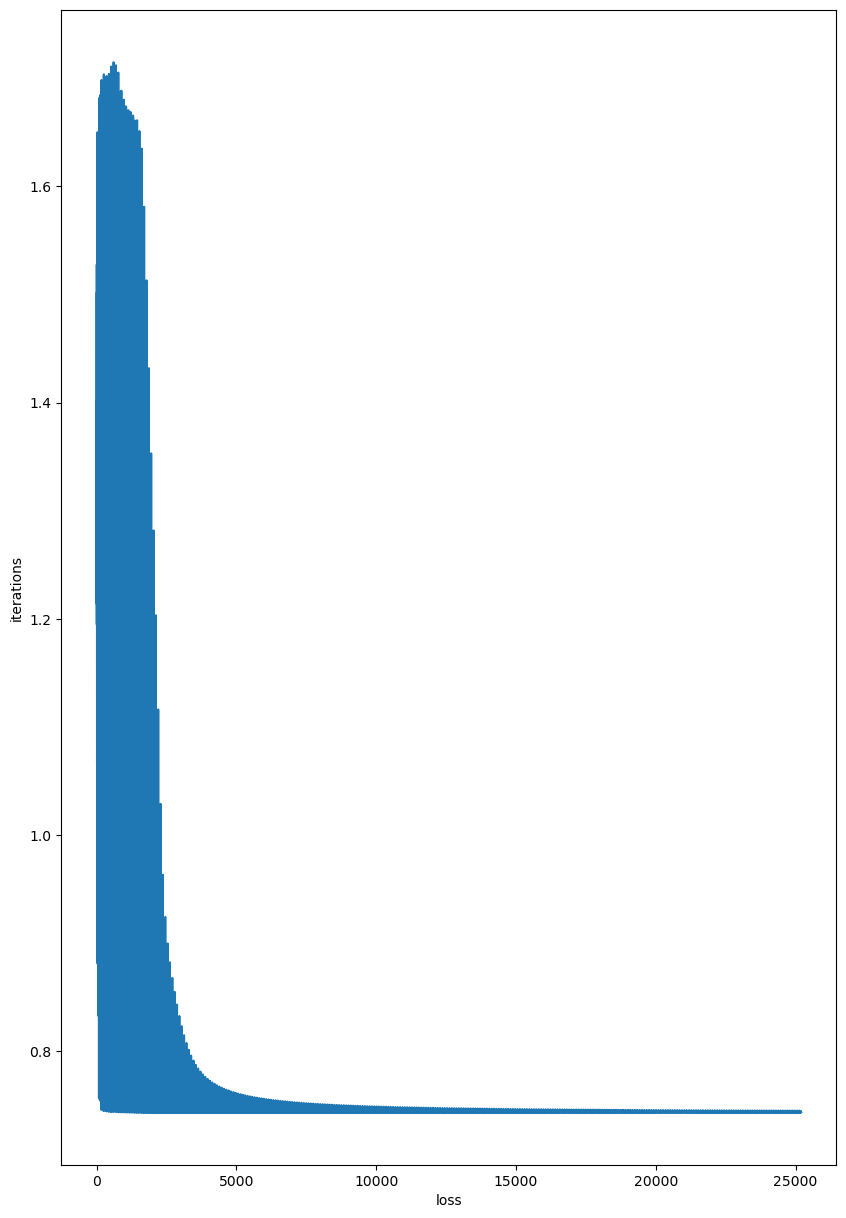

In [113]:
model = NeuralNetwork().to(device)
print(model)

learning_rate = 0.01
epoch = 300
batch = 11

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


loss_count, count = train_loop(X_train, y_train, model, epoch, batch, loss_fn, optimizer, printFn=True)

In [118]:
accuracy = testing(X_test,y_test.to_numpy().ravel(),model,printFn=False)
print(accuracy)

Accuracy:  0.9459459459459459
(0.9459459459459459, [tensor(2), tensor(3), tensor(1), tensor(0), tensor(0), tensor(2), tensor(2), tensor(0), tensor(0), tensor(0), tensor(2), tensor(0), tensor(3), tensor(2), tensor(1), tensor(0), tensor(2), tensor(3), tensor(2), tensor(2), tensor(3), tensor(3), tensor(1), tensor(0), tensor(1), tensor(1), tensor(2), tensor(1), tensor(1), tensor(2), tensor(3), tensor(0), tensor(2), tensor(2), tensor(0), tensor(2), tensor(3)])


In [119]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [120]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))
model.eval()

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=4, bias=True)
    (4): Softmax(dim=None)
  )
)

In [121]:
accuracy,preds = testing(X_test,y_test.to_numpy().ravel(),model,printFn=False)
print(accuracy)

Accuracy:  0.9459459459459459
0.9459459459459459


Specificity: 
      label  specificity
0       CD     1.000000
1       GN     1.000000
2     HPDE     0.923077
3  MiaPaCa     1.000000
Sensitivity: 
      label  sensitivity
0       CD     1.000000
1       GN     1.000000
2     HPDE     1.000000
3  MiaPaCa     0.777778


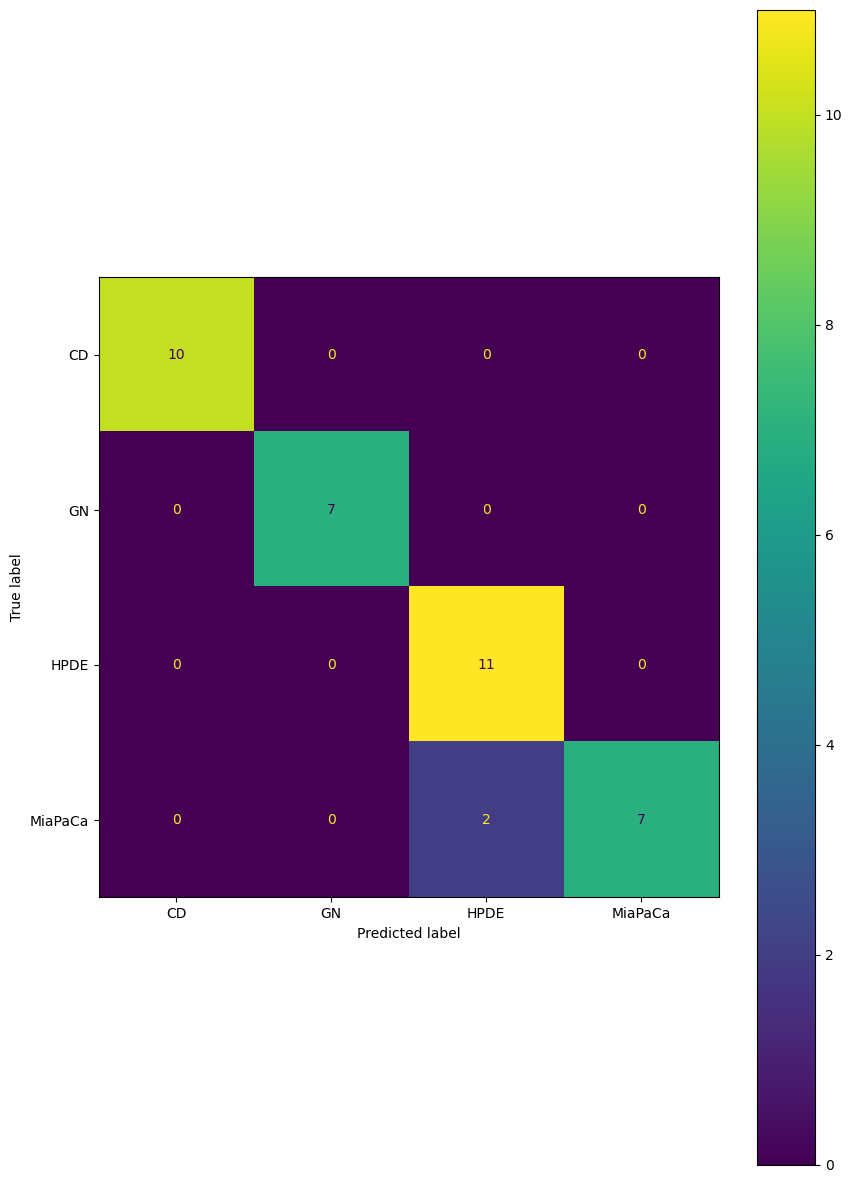

In [124]:
res = []
for l in [0,1,2,3]:
     prec,recall,_,_ = precision_recall_fscore_support(np.array(y_test)==l,
                                                  np.array(preds)==l,
                                                  pos_label=True,average=None)
     res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')

confusion_mat = metrics.confusion_matrix(y_test.values.ravel(), np.array(preds),labels=[0,1,2,3])

print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()

In [125]:
print('Overall specificity: ', statistics_df['specificity'].mean())
print('Overall sensitivity: ', statistics_df['sensitivity'].mean())

Overall specificity:  0.9807692307692308
Overall sensitivity:  0.9444444444444444


This results display better accuracy, sensitivity, and specificity. <br>
My accuracy: 94% whereas the study's accuracy is 90%. <br>
My specificity: 98% whereas the study's specificity is 97%. <br>
Finally, my sensitivity: 95% whereas the study's sensitivity is 91%.<br>
Overall, the neural network seems to work better!

In [190]:
model = NeuralNetwork().to(device)

In [191]:
model

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=4, bias=True)
    (4): Softmax(dim=None)
  )
)

In [192]:
from sklearn.model_selection import KFold

split = 25

#kfold = KFold(n_splits=X.shape[0], shuffle=True)
kfold = KFold(n_splits=split, shuffle=True)

all_pred = np.array([])
y_match = np.array([])
accuracies = []
for fold, (train_ids, test_ids) in enumerate(kfold.split(X)):
    
    model = NeuralNetwork().to(device)
    learning_rate = 0.01
    epoch = 300
    batch = 11

    loss_fn = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


    loss_count, count = train_loop(X[train_ids], 
                                   y.to_numpy().ravel()[train_ids],
                                   model, 
                                   epoch, batch, 
                                   loss_fn, 
                                   optimizer, 
                                   printFn=False)
    
    accuracy,preds = testing(X[test_ids],y.to_numpy().ravel()[test_ids],model,printFn=False)
    accuracies.append(accuracy)
    all_pred = np.append(all_pred,preds)
    y_match = np.append(y_match,y.to_numpy().ravel()[test_ids])

print('Overall Accuracy: ', np.array(accuracies).mean())
confusion_mat = confusion_matrix(y_match, all_pred, labels=[0,1,2,3])

res = []
for l in [0,1,2,3]:
    prec,recall,_,_ = precision_recall_fscore_support(y_match==l,
                                                  all_pred==l,
                                                  labels=[0,1,2,3],
                                                  pos_label=True,
                                                  average=None)
    res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')


print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])
print('Overall Specificity: \n', statistics_df[['specificity']].mean())
print('Overall Sensitivity: \n', statistics_df[['sensitivity']].mean())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()

C:\Users\brian\Anaconda3\Lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Accuracy:  1.0
Accuracy:  0.8



KeyboardInterrupt



Let us see whether non-PCA transformed data works better with the neural network.

In [195]:
model

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=4, bias=True)
    (4): Softmax(dim=None)
  )
)

In [196]:
model.linear_relu_stack.add_module('0', nn.Linear(1013,30))

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1013, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=30, bias=True)
    (2): Linear(in_features=30, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=4, bias=True)
    (4): Softmax(dim=None)
  )
)


epoch 0: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 1.307180


epoch 0: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 0.743668


epoch 0: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 1.530206


epoch 0: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 1.743668


epoch 0: 
----------------------------------------------------------------------------------------------------
40/8



epoch 7: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.743668


epoch 7: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 1.743668


epoch 8: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 0.743668


epoch 8: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.755076


epoch 8: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 1.743668


epoch 8: 
----------------------------------------------------------------------------------------------------
38/84 ----> loss: 1.723375


epoch 8: 
----------------------------------------------------------------------------------------------------
48/84 ----> loss: 0.764437


epoch 8: 
---------



epoch 16: 
----------------------------------------------------------------------------------------------------
16/84 ----> loss: 0.743668


epoch 16: 
----------------------------------------------------------------------------------------------------
26/84 ----> loss: 1.743668


epoch 16: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 1.675384


epoch 16: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 1.743668


epoch 16: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743679


epoch 16: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743668


epoch 16: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743832


epoch 17: 




epoch 23: 
----------------------------------------------------------------------------------------------------
58/84 ----> loss: 1.743668


epoch 23: 
----------------------------------------------------------------------------------------------------
68/84 ----> loss: 0.743668


epoch 23: 
----------------------------------------------------------------------------------------------------
78/84 ----> loss: 0.743668


epoch 24: 
----------------------------------------------------------------------------------------------------
4/84 ----> loss: 0.743668


epoch 24: 
----------------------------------------------------------------------------------------------------
14/84 ----> loss: 0.746936


epoch 24: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743671


epoch 24: 
----------------------------------------------------------------------------------------------------
34/84 ----> loss: 1.743668


epoch 24: 
-



epoch 30: 
----------------------------------------------------------------------------------------------------
80/84 ----> loss: 1.736642


epoch 31: 
----------------------------------------------------------------------------------------------------
6/84 ----> loss: 0.743668


epoch 31: 
----------------------------------------------------------------------------------------------------
16/84 ----> loss: 0.743668


epoch 31: 
----------------------------------------------------------------------------------------------------
26/84 ----> loss: 1.743668


epoch 31: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.744920


epoch 31: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 1.743668


epoch 31: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743671


epoch 31: 
-



epoch 38: 
----------------------------------------------------------------------------------------------------
48/84 ----> loss: 0.743668


epoch 38: 
----------------------------------------------------------------------------------------------------
58/84 ----> loss: 1.743668


epoch 38: 
----------------------------------------------------------------------------------------------------
68/84 ----> loss: 0.743668


epoch 38: 
----------------------------------------------------------------------------------------------------
78/84 ----> loss: 0.743668


epoch 39: 
----------------------------------------------------------------------------------------------------
4/84 ----> loss: 0.743668


epoch 39: 
----------------------------------------------------------------------------------------------------
14/84 ----> loss: 0.747264


epoch 39: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743670


epoch 39: 
-



epoch 46: 
----------------------------------------------------------------------------------------------------
16/84 ----> loss: 0.743668


epoch 46: 
----------------------------------------------------------------------------------------------------
26/84 ----> loss: 1.743668


epoch 46: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.744399


epoch 46: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 1.743668


epoch 46: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743671


epoch 46: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743668


epoch 46: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743672


epoch 47: 




epoch 54: 
----------------------------------------------------------------------------------------------------
14/84 ----> loss: 0.745448


epoch 54: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743670


epoch 54: 
----------------------------------------------------------------------------------------------------
34/84 ----> loss: 1.743668


epoch 54: 
----------------------------------------------------------------------------------------------------
44/84 ----> loss: 1.743668


epoch 54: 
----------------------------------------------------------------------------------------------------
54/84 ----> loss: 0.743668


epoch 54: 
----------------------------------------------------------------------------------------------------
64/84 ----> loss: 0.743855


epoch 54: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 1.743668


epoch 55: 




epoch 62: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.743673


epoch 62: 
----------------------------------------------------------------------------------------------------
32/84 ----> loss: 1.743668


epoch 62: 
----------------------------------------------------------------------------------------------------
42/84 ----> loss: 0.743668


epoch 62: 
----------------------------------------------------------------------------------------------------
52/84 ----> loss: 1.743668


epoch 62: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.743668


epoch 62: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.743668


epoch 62: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 1.743668


epoch 63: 




epoch 70: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743668


epoch 70: 
----------------------------------------------------------------------------------------------------
40/84 ----> loss: 0.743668


epoch 70: 
----------------------------------------------------------------------------------------------------
50/84 ----> loss: 0.743669


epoch 70: 
----------------------------------------------------------------------------------------------------
60/84 ----> loss: 0.743671


epoch 70: 
----------------------------------------------------------------------------------------------------
70/84 ----> loss: 1.743668


epoch 70: 
----------------------------------------------------------------------------------------------------
80/84 ----> loss: 1.734233


epoch 71: 
----------------------------------------------------------------------------------------------------
6/84 ----> loss: 0.743668


epoch 71: 
-



epoch 77: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.743668


epoch 77: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 1.743668


epoch 78: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 0.743668


epoch 78: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.743858


epoch 78: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 1.743668


epoch 78: 
----------------------------------------------------------------------------------------------------
38/84 ----> loss: 0.743668


epoch 78: 
----------------------------------------------------------------------------------------------------
48/84 ----> loss: 0.743668


epoch 78: 
-



epoch 84: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 1.743668


epoch 85: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 1.743668


epoch 85: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 1.743668


epoch 85: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743669


epoch 85: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743668


epoch 85: 
----------------------------------------------------------------------------------------------------
40/84 ----> loss: 0.743668


epoch 85: 
----------------------------------------------------------------------------------------------------
50/84 ----> loss: 0.743669


epoch 85: 
-



epoch 92: 
----------------------------------------------------------------------------------------------------
42/84 ----> loss: 0.743668


epoch 92: 
----------------------------------------------------------------------------------------------------
52/84 ----> loss: 1.743668


epoch 92: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.743668


epoch 92: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.743668


epoch 92: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 1.743668


epoch 93: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 0.743668


epoch 93: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.743843


epoch 93: 
-



epoch 100: 
----------------------------------------------------------------------------------------------------
80/84 ----> loss: 1.717936


epoch 101: 
----------------------------------------------------------------------------------------------------
6/84 ----> loss: 0.743668


epoch 101: 
----------------------------------------------------------------------------------------------------
16/84 ----> loss: 0.743668


epoch 101: 
----------------------------------------------------------------------------------------------------
26/84 ----> loss: 1.743668


epoch 101: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.744109


epoch 101: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 1.743668


epoch 101: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743672


epoch



epoch 109: 
----------------------------------------------------------------------------------------------------
54/84 ----> loss: 0.743668


epoch 109: 
----------------------------------------------------------------------------------------------------
64/84 ----> loss: 0.743888


epoch 109: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 1.743668


epoch 110: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 1.743668


epoch 110: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 1.743668


epoch 110: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743669


epoch 110: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743668


epoch



epoch 117: 
----------------------------------------------------------------------------------------------------
52/84 ----> loss: 1.743668


epoch 117: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.743668


epoch 117: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.743668


epoch 117: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 1.743668


epoch 118: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 0.743668


epoch 118: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.743874


epoch 118: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 1.743668


epoch



epoch 124: 
----------------------------------------------------------------------------------------------------
64/84 ----> loss: 0.743881


epoch 124: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 1.743668


epoch 125: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 1.743668


epoch 125: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 1.743668


epoch 125: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743669


epoch 125: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743668


epoch 125: 
----------------------------------------------------------------------------------------------------
40/84 ----> loss: 0.743668


epoch



epoch 131: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743668


epoch 131: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743699


epoch 132: 
----------------------------------------------------------------------------------------------------
2/84 ----> loss: 1.743668


epoch 132: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743668


epoch 132: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.743675


epoch 132: 
----------------------------------------------------------------------------------------------------
32/84 ----> loss: 1.743668


epoch 132: 
----------------------------------------------------------------------------------------------------
42/84 ----> loss: 0.743668


epoch



epoch 138: 
----------------------------------------------------------------------------------------------------
58/84 ----> loss: 1.743668


epoch 138: 
----------------------------------------------------------------------------------------------------
68/84 ----> loss: 0.743668


epoch 138: 
----------------------------------------------------------------------------------------------------
78/84 ----> loss: 0.743668


epoch 139: 
----------------------------------------------------------------------------------------------------
4/84 ----> loss: 0.743668


epoch 139: 
----------------------------------------------------------------------------------------------------
14/84 ----> loss: 0.747686


epoch 139: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743701


epoch 139: 
----------------------------------------------------------------------------------------------------
34/84 ----> loss: 1.743668


epoch



epoch 145: 
----------------------------------------------------------------------------------------------------
80/84 ----> loss: 1.687277


epoch 146: 
----------------------------------------------------------------------------------------------------
6/84 ----> loss: 0.743668


epoch 146: 
----------------------------------------------------------------------------------------------------
16/84 ----> loss: 0.743668


epoch 146: 
----------------------------------------------------------------------------------------------------
26/84 ----> loss: 1.743668


epoch 146: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.744291


epoch 146: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 1.743668


epoch 146: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743673


epoch



epoch 153: 
----------------------------------------------------------------------------------------------------
78/84 ----> loss: 0.743668


epoch 154: 
----------------------------------------------------------------------------------------------------
4/84 ----> loss: 0.743668


epoch 154: 
----------------------------------------------------------------------------------------------------
14/84 ----> loss: 0.743714


epoch 154: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743669


epoch 154: 
----------------------------------------------------------------------------------------------------
34/84 ----> loss: 1.743668


epoch 154: 
----------------------------------------------------------------------------------------------------
44/84 ----> loss: 1.743668


epoch 154: 
----------------------------------------------------------------------------------------------------
54/84 ----> loss: 0.743668


epoch



epoch 162: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743668


epoch 162: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.743677


epoch 162: 
----------------------------------------------------------------------------------------------------
32/84 ----> loss: 1.743668


epoch 162: 
----------------------------------------------------------------------------------------------------
42/84 ----> loss: 0.743668


epoch 162: 
----------------------------------------------------------------------------------------------------
52/84 ----> loss: 1.743668


epoch 162: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.743668


epoch 162: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.743668


epoc



epoch 171: 
----------------------------------------------------------------------------------------------------
6/84 ----> loss: 0.743668


epoch 171: 
----------------------------------------------------------------------------------------------------
16/84 ----> loss: 0.743668


epoch 171: 
----------------------------------------------------------------------------------------------------
26/84 ----> loss: 1.743668


epoch 171: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.743962


epoch 171: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 1.743668


epoch 171: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743677


epoch 171: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743668


epoch



epoch 179: 
----------------------------------------------------------------------------------------------------
54/84 ----> loss: 0.743668


epoch 179: 
----------------------------------------------------------------------------------------------------
64/84 ----> loss: 0.743861


epoch 179: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 1.743668


epoch 180: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 1.743668


epoch 180: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 1.743668


epoch 180: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743669


epoch 180: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743668


epoch



epoch 188: 
----------------------------------------------------------------------------------------------------
38/84 ----> loss: 0.743668


epoch 188: 
----------------------------------------------------------------------------------------------------
48/84 ----> loss: 0.743668


epoch 188: 
----------------------------------------------------------------------------------------------------
58/84 ----> loss: 1.743668


epoch 188: 
----------------------------------------------------------------------------------------------------
68/84 ----> loss: 0.743668


epoch 188: 
----------------------------------------------------------------------------------------------------
78/84 ----> loss: 0.743669


epoch 189: 
----------------------------------------------------------------------------------------------------
4/84 ----> loss: 0.743668


epoch 189: 
----------------------------------------------------------------------------------------------------
14/84 ----> loss: 0.743684


epoch



epoch 197: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743668


epoch 197: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.743679


epoch 197: 
----------------------------------------------------------------------------------------------------
32/84 ----> loss: 1.743668


epoch 197: 
----------------------------------------------------------------------------------------------------
42/84 ----> loss: 0.743668


epoch 197: 
----------------------------------------------------------------------------------------------------
52/84 ----> loss: 1.743668


epoch 197: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.743668


epoch 197: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.743668


epoc



epoch 205: 
----------------------------------------------------------------------------------------------------
80/84 ----> loss: 1.672521


epoch 206: 
----------------------------------------------------------------------------------------------------
6/84 ----> loss: 0.743668


epoch 206: 
----------------------------------------------------------------------------------------------------
16/84 ----> loss: 0.743668


epoch 206: 
----------------------------------------------------------------------------------------------------
26/84 ----> loss: 1.743668


epoch 206: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.743786


epoch 206: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 1.743668


epoch 206: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743681


epoch



epoch 214: 
----------------------------------------------------------------------------------------------------
74/84 ----> loss: 1.743668


epoch 215: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 1.743668


epoch 215: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 1.743668


epoch 215: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743669


epoch 215: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743668


epoch 215: 
----------------------------------------------------------------------------------------------------
40/84 ----> loss: 0.743668


epoch 215: 
----------------------------------------------------------------------------------------------------
50/84 ----> loss: 0.743669


epoch



epoch 223: 
----------------------------------------------------------------------------------------------------
58/84 ----> loss: 1.743668


epoch 223: 
----------------------------------------------------------------------------------------------------
68/84 ----> loss: 0.743668


epoch 223: 
----------------------------------------------------------------------------------------------------
78/84 ----> loss: 0.743669


epoch 224: 
----------------------------------------------------------------------------------------------------
4/84 ----> loss: 0.743668


epoch 224: 
----------------------------------------------------------------------------------------------------
14/84 ----> loss: 0.744450


epoch 224: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743680


epoch 224: 
----------------------------------------------------------------------------------------------------
34/84 ----> loss: 1.743668


epoch



epoch 232: 
----------------------------------------------------------------------------------------------------
52/84 ----> loss: 1.743668


epoch 232: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.743668


epoch 232: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.743668


epoch 232: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 1.743668


epoch 233: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 0.743668


epoch 233: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.743860


epoch 233: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 1.743668


epoch



epoch 241: 
----------------------------------------------------------------------------------------------------
26/84 ----> loss: 1.743668


epoch 241: 
----------------------------------------------------------------------------------------------------
36/84 ----> loss: 0.743959


epoch 241: 
----------------------------------------------------------------------------------------------------
46/84 ----> loss: 1.743668


epoch 241: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743679


epoch 241: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743668


epoch 241: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743749


epoch 242: 
----------------------------------------------------------------------------------------------------
2/84 ----> loss: 1.743668


epoch



epoch 250: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 1.743668


epoch 250: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743669


epoch 250: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743668


epoch 250: 
----------------------------------------------------------------------------------------------------
40/84 ----> loss: 0.743668


epoch 250: 
----------------------------------------------------------------------------------------------------
50/84 ----> loss: 0.743669


epoch 250: 
----------------------------------------------------------------------------------------------------
60/84 ----> loss: 0.743670


epoch 250: 
----------------------------------------------------------------------------------------------------
70/84 ----> loss: 1.743668


epoc



epoch 258: 
----------------------------------------------------------------------------------------------------
48/84 ----> loss: 0.743668


epoch 258: 
----------------------------------------------------------------------------------------------------
58/84 ----> loss: 1.743668


epoch 258: 
----------------------------------------------------------------------------------------------------
68/84 ----> loss: 0.743668


epoch 258: 
----------------------------------------------------------------------------------------------------
78/84 ----> loss: 0.743669


epoch 259: 
----------------------------------------------------------------------------------------------------
4/84 ----> loss: 0.743668


epoch 259: 
----------------------------------------------------------------------------------------------------
14/84 ----> loss: 0.743770


epoch 259: 
----------------------------------------------------------------------------------------------------
24/84 ----> loss: 0.743670


epoch



epoch 267: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.743688


epoch 267: 
----------------------------------------------------------------------------------------------------
32/84 ----> loss: 1.743668


epoch 267: 
----------------------------------------------------------------------------------------------------
42/84 ----> loss: 0.743668


epoch 267: 
----------------------------------------------------------------------------------------------------
52/84 ----> loss: 1.743668


epoch 267: 
----------------------------------------------------------------------------------------------------
62/84 ----> loss: 0.743668


epoch 267: 
----------------------------------------------------------------------------------------------------
72/84 ----> loss: 0.743668


epoch 267: 
----------------------------------------------------------------------------------------------------
82/84 ----> loss: 1.743668


epoc



epoch 275: 
----------------------------------------------------------------------------------------------------
0/84 ----> loss: 1.743668


epoch 275: 
----------------------------------------------------------------------------------------------------
10/84 ----> loss: 1.743668


epoch 275: 
----------------------------------------------------------------------------------------------------
20/84 ----> loss: 0.743669


epoch 275: 
----------------------------------------------------------------------------------------------------
30/84 ----> loss: 0.743668


epoch 275: 
----------------------------------------------------------------------------------------------------
40/84 ----> loss: 0.743668


epoch 275: 
----------------------------------------------------------------------------------------------------
50/84 ----> loss: 0.743668


epoch 275: 
----------------------------------------------------------------------------------------------------
60/84 ----> loss: 0.743670


epoch



epoch 283: 
----------------------------------------------------------------------------------------------------
8/84 ----> loss: 0.743668


epoch 283: 
----------------------------------------------------------------------------------------------------
18/84 ----> loss: 0.743839


epoch 283: 
----------------------------------------------------------------------------------------------------
28/84 ----> loss: 1.743668


epoch 283: 
----------------------------------------------------------------------------------------------------
38/84 ----> loss: 0.743668


epoch 283: 
----------------------------------------------------------------------------------------------------
48/84 ----> loss: 0.743668


epoch 283: 
----------------------------------------------------------------------------------------------------
58/84 ----> loss: 1.743668


epoch 283: 
----------------------------------------------------------------------------------------------------
68/84 ----> loss: 0.743668


epoch



epoch 291: 
----------------------------------------------------------------------------------------------------
56/84 ----> loss: 0.743685


epoch 291: 
----------------------------------------------------------------------------------------------------
66/84 ----> loss: 0.743668


epoch 291: 
----------------------------------------------------------------------------------------------------
76/84 ----> loss: 0.743715


epoch 292: 
----------------------------------------------------------------------------------------------------
2/84 ----> loss: 1.743668


epoch 292: 
----------------------------------------------------------------------------------------------------
12/84 ----> loss: 0.743669


epoch 292: 
----------------------------------------------------------------------------------------------------
22/84 ----> loss: 0.743691


epoch 292: 
----------------------------------------------------------------------------------------------------
32/84 ----> loss: 1.743668


epoch

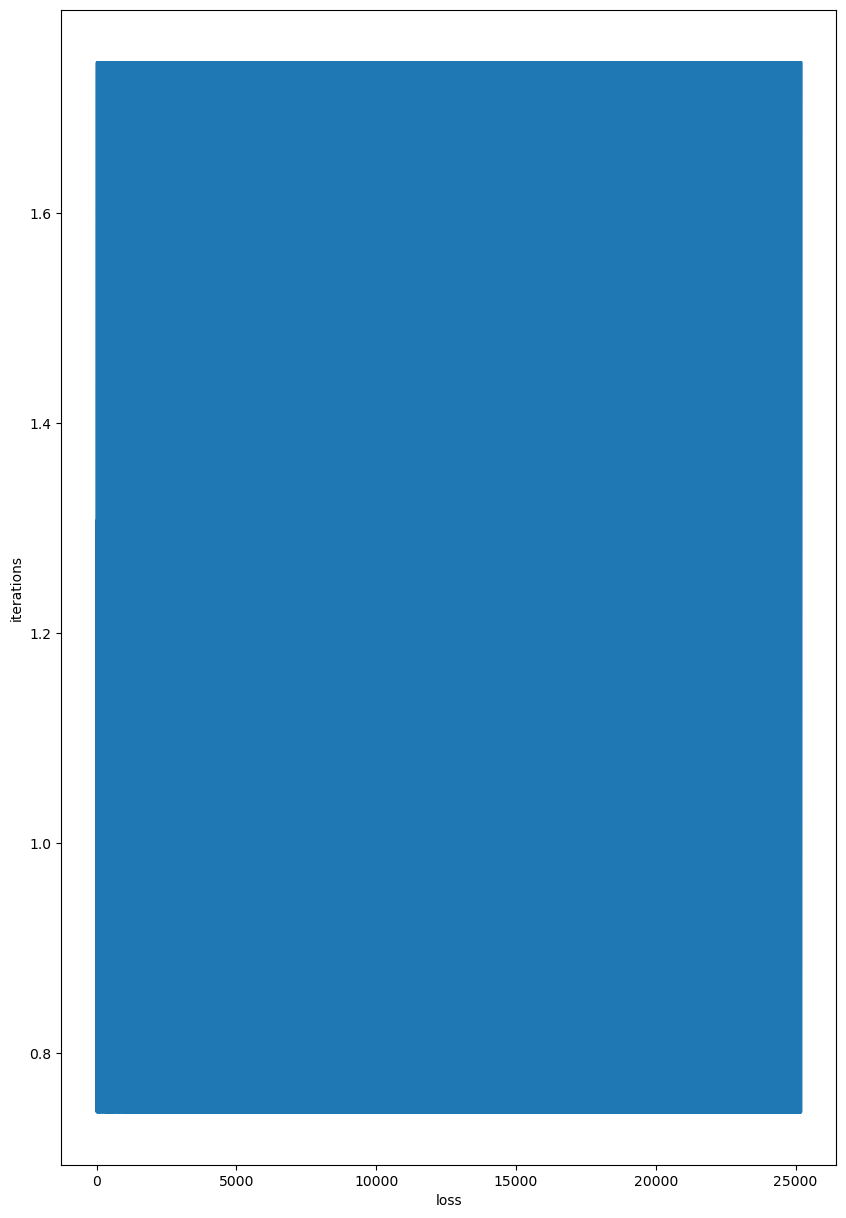

In [197]:
print(model)

learning_rate = 0.01
epoch = 300
batch = 11

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


loss_count, count = train_loop(X_train_noPCA.values, y_train_noPCA, model, epoch, batch, loss_fn, optimizer, printFn=True)

In [198]:
accuracy,preds = testing(X_test_noPCA.values,y_test_noPCA.to_numpy().ravel(),model,printFn=False)
print(accuracy)

Accuracy:  0.7297297297297297
0.7297297297297297


Tried a bunch of other architecture of neural network with various numbers of nodes and layers, but it does not seem to converge. 

In [199]:
X_noPCA = df_master.drop(columns=['Target']).reset_index().drop(columns=['index']).to_numpy()

C:\Users\brian\Anaconda3\Lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Accuracy:  0.8
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Accuracy:  1.0
Overall Accuracy:  0.992
Specificity: 
      label  specificity
0       CD     1.000000
1       GN     1.000000
2     HPDE     1.000000
3  MiaPaCa     0.988889
Sensitivity: 
      label  sensitivity
0       CD     1.000000
1       GN     1.000000
2     HPDE     0.971429
3  MiaPaCa     1.000000
Overall Specificity: 
 specificity    0.997222
dtype: float64
Overall Sensitivity: 
 sensitivity    0.992857
dtype: float64


C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\brian\Anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\brian\Anaconda3\Lib\site-package

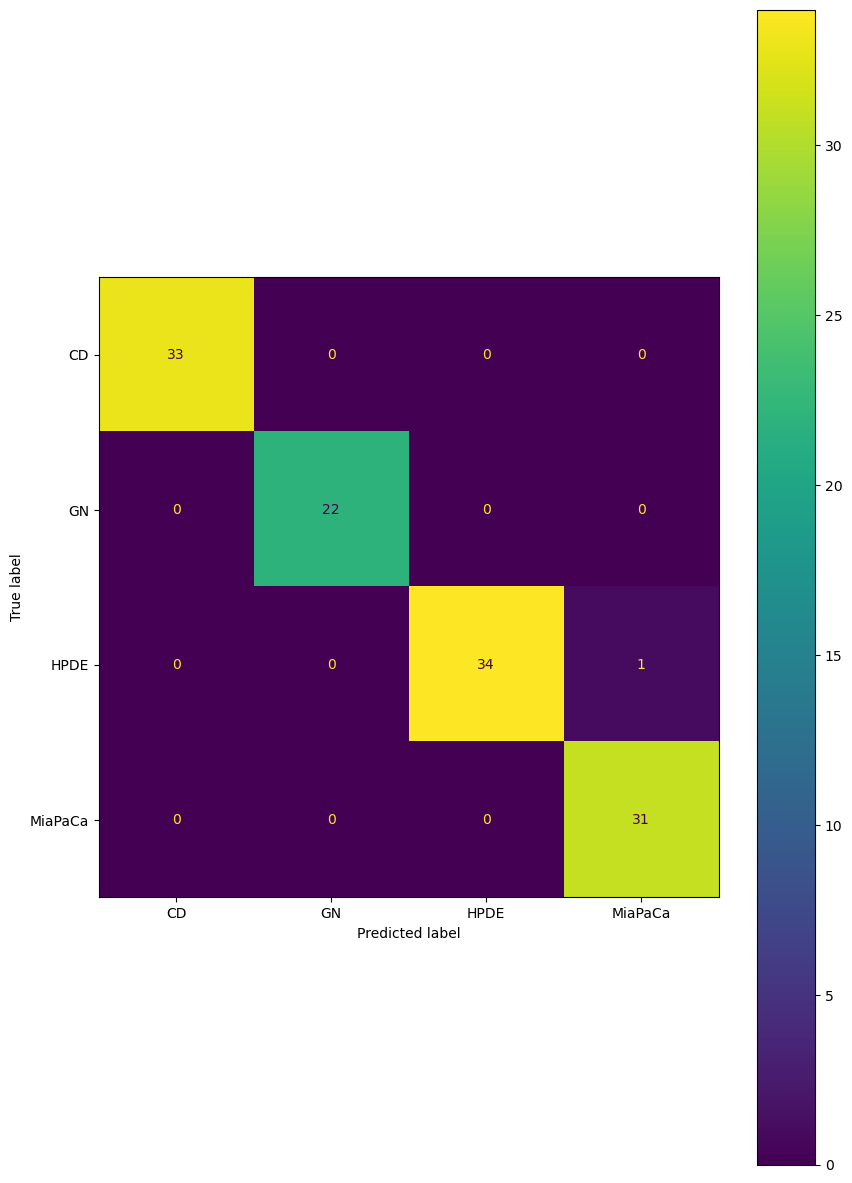

In [200]:
split = 25

#kfold = KFold(n_splits=X.shape[0], shuffle=True)
kfold = KFold(n_splits=split, shuffle=True)

all_pred = np.array([])
y_match = np.array([])
accuracies = []
for fold, (train_ids, test_ids) in enumerate(kfold.split(X_noPCA)):
    
    learning_rate = 0.01
    epoch = 300
    batch = 11

    loss_fn = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


    loss_count, count = train_loop(X_noPCA[train_ids], 
                                   y.to_numpy().ravel()[train_ids],
                                   model, 
                                   epoch, batch, 
                                   loss_fn, 
                                   optimizer, 
                                   printFn=False)
    
    accuracy,preds = testing(X_noPCA[test_ids],y.to_numpy().ravel()[test_ids],model,printFn=False)
    accuracies.append(accuracy)
    all_pred = np.append(all_pred,preds)
    y_match = np.append(y_match,y.to_numpy().ravel()[test_ids])

print('Overall Accuracy: ', np.array(accuracies).mean())
conf_mat = confusion_matrix(y_match, all_pred, labels=[0,1,2,3])

res = []
for l in [0,1,2,3]:
    prec,recall,_,_ = precision_recall_fscore_support(y_match==l,
                                                  all_pred==l,
                                                  labels=[0,1,2,3],
                                                  pos_label=True,
                                                  average=None)
    res.append([l,recall[0],recall[1]])

statistics_df = pd.DataFrame(res,columns = ['class','specificity','sensitivity'])
statistics_df['label'] = statistics_df['class'].apply(lambda x: 'CD' if x==0 else 'GN' if x==1 else 'HPDE' if x==2 else 'MiaPaCa')


print('Specificity: \n', statistics_df[['label','specificity']])
print('Sensitivity: \n', statistics_df[['label','sensitivity']])
print('Overall Specificity: \n', statistics_df[['specificity']].mean())
print('Overall Sensitivity: \n', statistics_df[['sensitivity']].mean())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = statistics_df['label'].to_list())
cm_display.plot()
plt.show()